In [ ]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

In [1]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git 

In [1]:
import pandas as pf 

In [2]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="J1mmAuxLk77g4eiOvCmr")
project = rf.workspace("cauliflower-diseases").project("cauliflower-diseases-recognition")
version = project.version(3)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cauliflower-Diseases-Recognition-3 in yolov11:: 100%|██████████| 1296/1296 [00:19<00:00, 64.82it/s] 


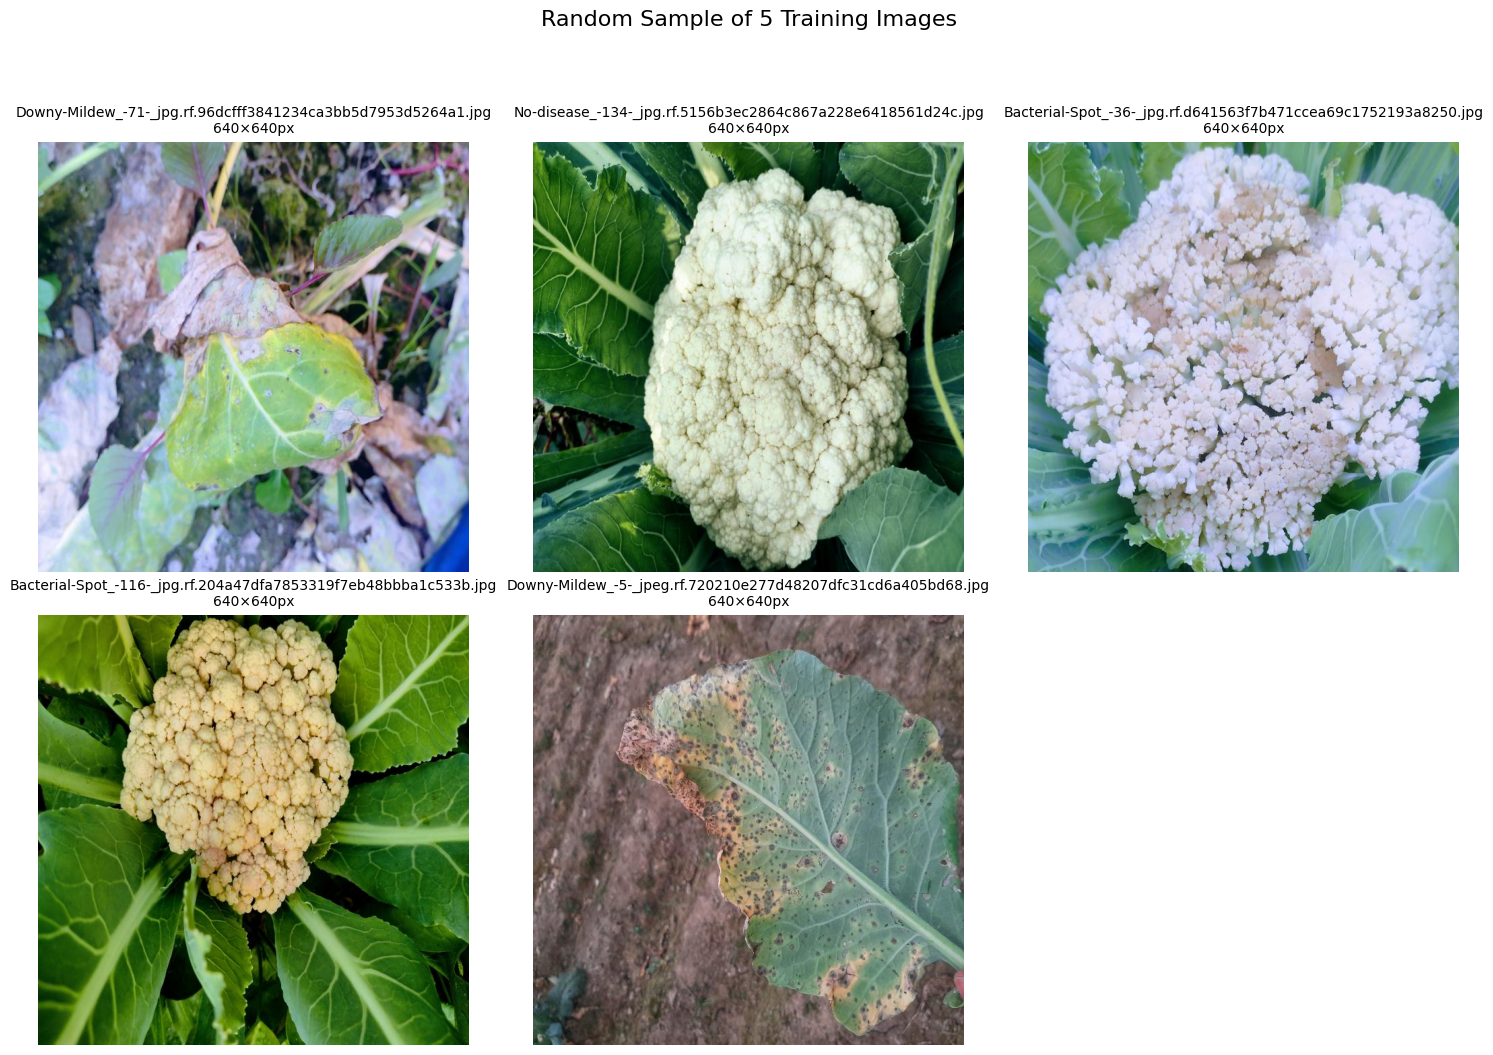

In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the images directory
image_dir = r"Cauliflower-Diseases-Recognition-3\test\images"  # Update with your directory path

# Get a list of all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

if not image_files:
    print("No images found in the directory!")
    exit()

# Determine sample size (max 5 or available images)
sample_size = min(5, len(image_files))
random_images = random.sample(image_files, sample_size)

# Calculate grid layout (max 3 columns)
cols = min(3, sample_size)
rows = (sample_size + cols - 1) // cols  # Ceiling division

# Create figure with appropriate size
fig = plt.figure(figsize=(5 * cols, 5 * rows))
fig.suptitle(f"Random Sample of {sample_size} Training Images", fontsize=16, y=1.05)

# Display each image
for i, img_file in enumerate(random_images, 1):
    try:
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path)
        
        ax = fig.add_subplot(rows, cols, i)
        ax.imshow(img)
        
        # Add informative title with filename and dimensions
        title = f"{img_file}\n{img.size[0]}×{img.size[1]}px"
        ax.set_title(title, fontsize=10)
        ax.axis('off')
        
    except Exception as e:
        print(f"Error loading {img_file}: {str(e)}")
        continue

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [2]:
import torch
import torchvision
from ultralytics import YOLO
print(torch.__version__, torch.version.cuda)
print(torchvision.__version__)
print(torch.cuda.is_available())


2.7.1+cu118 11.8
0.22.1+cu118
True


In [3]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt") 

results = model.train(
    data=r"Cauliflower-Diseases-Recognition-3\data.yaml", 
    epochs=30,                     
    imgsz=640,                  
    batch=16,                     
    project="yolov8-kaggle-training", 
    name="output", 
    cache=True                    
)

New https://pypi.org/project/ultralytics/8.3.179 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.63  Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=Cauliflower-Diseases-Recognition-3\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=yolov8-kaggle-training, name=output, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

train: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\train\labels... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<00:00, 898.70it/s]

train: New cache created: D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\train\labels.cache


WARNING  cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 449/449 [00:00<00:00, 2526.43it/s]
val: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 242.52it/s]

val: New cache created: D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels.cache


WARNING  cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 127/127 [00:00<00:00, 1751.30it/s]


Plotting labels to yolov8-kaggle-training\output\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolov8-kaggle-training\output
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.22G     0.5499      2.481      1.264          2        640: 100%|██████████| 29/29 [00:04<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]

                   all        127        131     0.0182      0.977      0.299      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.09G     0.3423      1.312      1.101          3        640: 100%|██████████| 29/29 [00:02<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all        127        131      0.927      0.214      0.408      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       2.1G     0.3556      1.049       1.08          4        640: 100%|██████████| 29/29 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        127        131      0.595      0.426      0.501      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.11G     0.3427     0.9154      1.097          2        640: 100%|██████████| 29/29 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        127        131        0.8        0.5      0.581      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       2.1G     0.3416     0.8291      1.081          4        640: 100%|██████████| 29/29 [00:03<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all        127        131      0.208      0.273      0.151      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       2.1G     0.3612     0.8367      1.146          2        640: 100%|██████████| 29/29 [00:03<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all        127        131      0.892      0.259      0.335      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.11G     0.3507     0.7981      1.134          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all        127        131      0.423      0.552      0.446      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.11G     0.3182     0.7059      1.086          3        640: 100%|██████████| 29/29 [00:03<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        127        131      0.477      0.748      0.665      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       2.1G     0.2814     0.6346      1.036          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all        127        131      0.537      0.714      0.611      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       2.1G     0.3085     0.7195      1.053          2        640: 100%|██████████| 29/29 [00:03<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        127        131      0.616      0.795      0.751      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.11G     0.2712     0.5507      1.023          2        640: 100%|██████████| 29/29 [00:03<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        127        131      0.639      0.737       0.69      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.11G     0.2558     0.5403      1.011          4        640: 100%|██████████| 29/29 [00:03<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        127        131      0.675      0.816      0.837      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       2.1G     0.2515     0.5185      1.032          4        640: 100%|██████████| 29/29 [00:03<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all        127        131      0.721      0.777      0.826      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.12G     0.2431     0.5415      1.016          2        640: 100%|██████████| 29/29 [00:03<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        127        131       0.77      0.789      0.856      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.11G      0.237     0.4635     0.9946          4        640: 100%|██████████| 29/29 [00:03<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all        127        131      0.911      0.805      0.913      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.11G     0.2204     0.4494     0.9888          4        640: 100%|██████████| 29/29 [00:03<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        127        131      0.789      0.857      0.906      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       2.1G     0.2189     0.4313     0.9788          4        640: 100%|██████████| 29/29 [00:03<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all        127        131      0.955      0.857      0.938      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       2.1G     0.2199     0.4274     0.9932          2        640: 100%|██████████| 29/29 [00:03<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        127        131      0.939      0.863      0.938      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.11G     0.1998     0.3863     0.9796          4        640: 100%|██████████| 29/29 [00:03<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        127        131      0.903      0.936      0.946      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.11G      0.201     0.3894     0.9865          3        640: 100%|██████████| 29/29 [00:03<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        127        131      0.957      0.899       0.95      0.729


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       2.2G     0.5665      1.829      1.555          1        640: 100%|██████████| 29/29 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        127        131      0.738      0.574      0.833      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       2.1G     0.4872     0.9075      1.371          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        127        131       0.93      0.785      0.905      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.11G      0.487     0.7724      1.383          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        127        131      0.943      0.861      0.926      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.11G     0.5504     0.7636      1.413          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        127        131      0.965      0.919      0.968      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       2.1G     0.4509     0.6805      1.308          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all        127        131      0.943      0.884      0.933      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       2.1G     0.4425      0.686       1.33          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        127        131      0.932      0.955      0.969      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.11G     0.4316     0.5689      1.301          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        127        131      0.954      0.926      0.961      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.11G     0.3924     0.5948      1.267          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        127        131      0.942       0.93      0.959      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       2.1G     0.3946     0.6207      1.263          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all        127        131      0.962      0.937      0.966      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       2.1G     0.3988     0.5661      1.237          1        640: 100%|██████████| 29/29 [00:03<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all        127        131      0.985      0.927      0.968      0.752



30 epochs completed in 0.049 hours.
Optimizer stripped from yolov8-kaggle-training\output\weights\last.pt, 6.2MB
Optimizer stripped from yolov8-kaggle-training\output\weights\best.pt, 6.2MB

Validating yolov8-kaggle-training\output\weights\best.pt...
Ultralytics 8.3.63  Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


                   all        127        131      0.962      0.937      0.966      0.753
    bacterial_spot_rot         33         33      0.968      0.921       0.99      0.787
             black_rot         21         22      0.943      0.909      0.921      0.522
          downy_mildew         33         34      0.985      0.971      0.982      0.765
            no_disease         40         42      0.952      0.949      0.972       0.94
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8-kaggle-training\output


In [4]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("yolov8-kaggle-training/output/weights/best.pt")

# Run validation and generate plots
metrics = model.val(
    data=r"Cauliflower-Diseases-Recognition-3\data.yaml",
    batch=16,
    imgsz=640,
    conf=0.25,
    iou=0.6,
    split="val",
    plots=True,  # <<< This generates the plots
    project="yolov8-kaggle-validation",
    name="val_output",
)

Ultralytics 8.3.63  Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]


                   all        127        131      0.954      0.948      0.974      0.786
    bacterial_spot_rot         33         33      0.969      0.947       0.98      0.803
             black_rot         21         22      0.922      0.909      0.948      0.573
          downy_mildew         33         34      0.974      0.971      0.985      0.802
            no_disease         40         42      0.953      0.964      0.985      0.965
Speed: 0.8ms preprocess, 3.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8-kaggle-validation\val_output


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Directory where plots are saved
plot_dir = "yolov8-kaggle-validation/val_output"

# List of plots to display
plot_files = [
    "confusion_matrix.png",
    "F1_curve.png",
    "PR_curve.png",
    "P_curve.png",
    "R_curve.png",
]

# Display each plot
for plot_file in plot_files:
    plot_path = os.path.join(plot_dir, plot_file)
    if os.path.exists(plot_path):
        img = mpimg.imread(plot_path)
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(plot_file)
        plt.show()
    else:
        print(f"⚠️ Plot not found: {plot_file}")

<Figure size 1000x600 with 1 Axes>

<Figure size 1000x600 with 1 Axes>

<Figure size 1000x600 with 1 Axes>

<Figure size 1000x600 with 1 Axes>

<Figure size 1000x600 with 1 Axes>

# YOLOV9

In [7]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.63  Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
Setup complete  (28 CPUs, 31.8 GB RAM, 4.6/500.5 GB disk)


In [8]:
!yolo task=detect  mode=train data=Cauliflower-Diseases-Recognition-3/data.yaml model=yolov9c.yaml epochs=100 imgsz=640 batch=16

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


train: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\train\labels.cache... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]
train: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\train\labels.cache... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]

val: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
val: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]
      1/100      10.8G       2.97      3.865       4.21         41        640:   0%|          | 0/29 [00:03<?, ?it/s]
      1/100      10.8G       2.97      3.865    


New https://pypi.org/project/ultralytics/8.3.179 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
engine\trainer: task=detect, mode=train, model=yolov9c.yaml, data=Cauliflower-Diseases-Recognition-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

     92/100      10.9G     0.4908     0.5342      1.369         17        640:  17%|█▋        | 5/29 [00:03<00:14,  1.70it/s]
     92/100      10.9G     0.5201     0.5742      1.403         18        640:  17%|█▋        | 5/29 [00:03<00:14,  1.70it/s]
     92/100      10.9G     0.5201     0.5742      1.403         18        640:  21%|██        | 6/29 [00:03<00:13,  1.76it/s]
     92/100      10.9G     0.5333      0.565      1.431         17        640:  21%|██        | 6/29 [00:04<00:13,  1.76it/s]
     92/100      10.9G     0.5333      0.565      1.431         17        640:  24%|██▍       | 7/29 [00:04<00:12,  1.80it/s]
     92/100      10.9G     0.5137     0.5366      1.413         16        640:  24%|██▍       | 7/29 [00:04<00:12,  1.80it/s]
     92/100      10.9G     0.5137     0.5366      1.413         16        640:  28%|██▊       | 8/29 [00:04<00:11,  1.83it/s]
     92/100      10.9G     0.4976     0.5213      1.401         16        640:  28%|██▊       | 8/29 [00:05<00:11,  1.

In [9]:
from IPython.display import Image, display

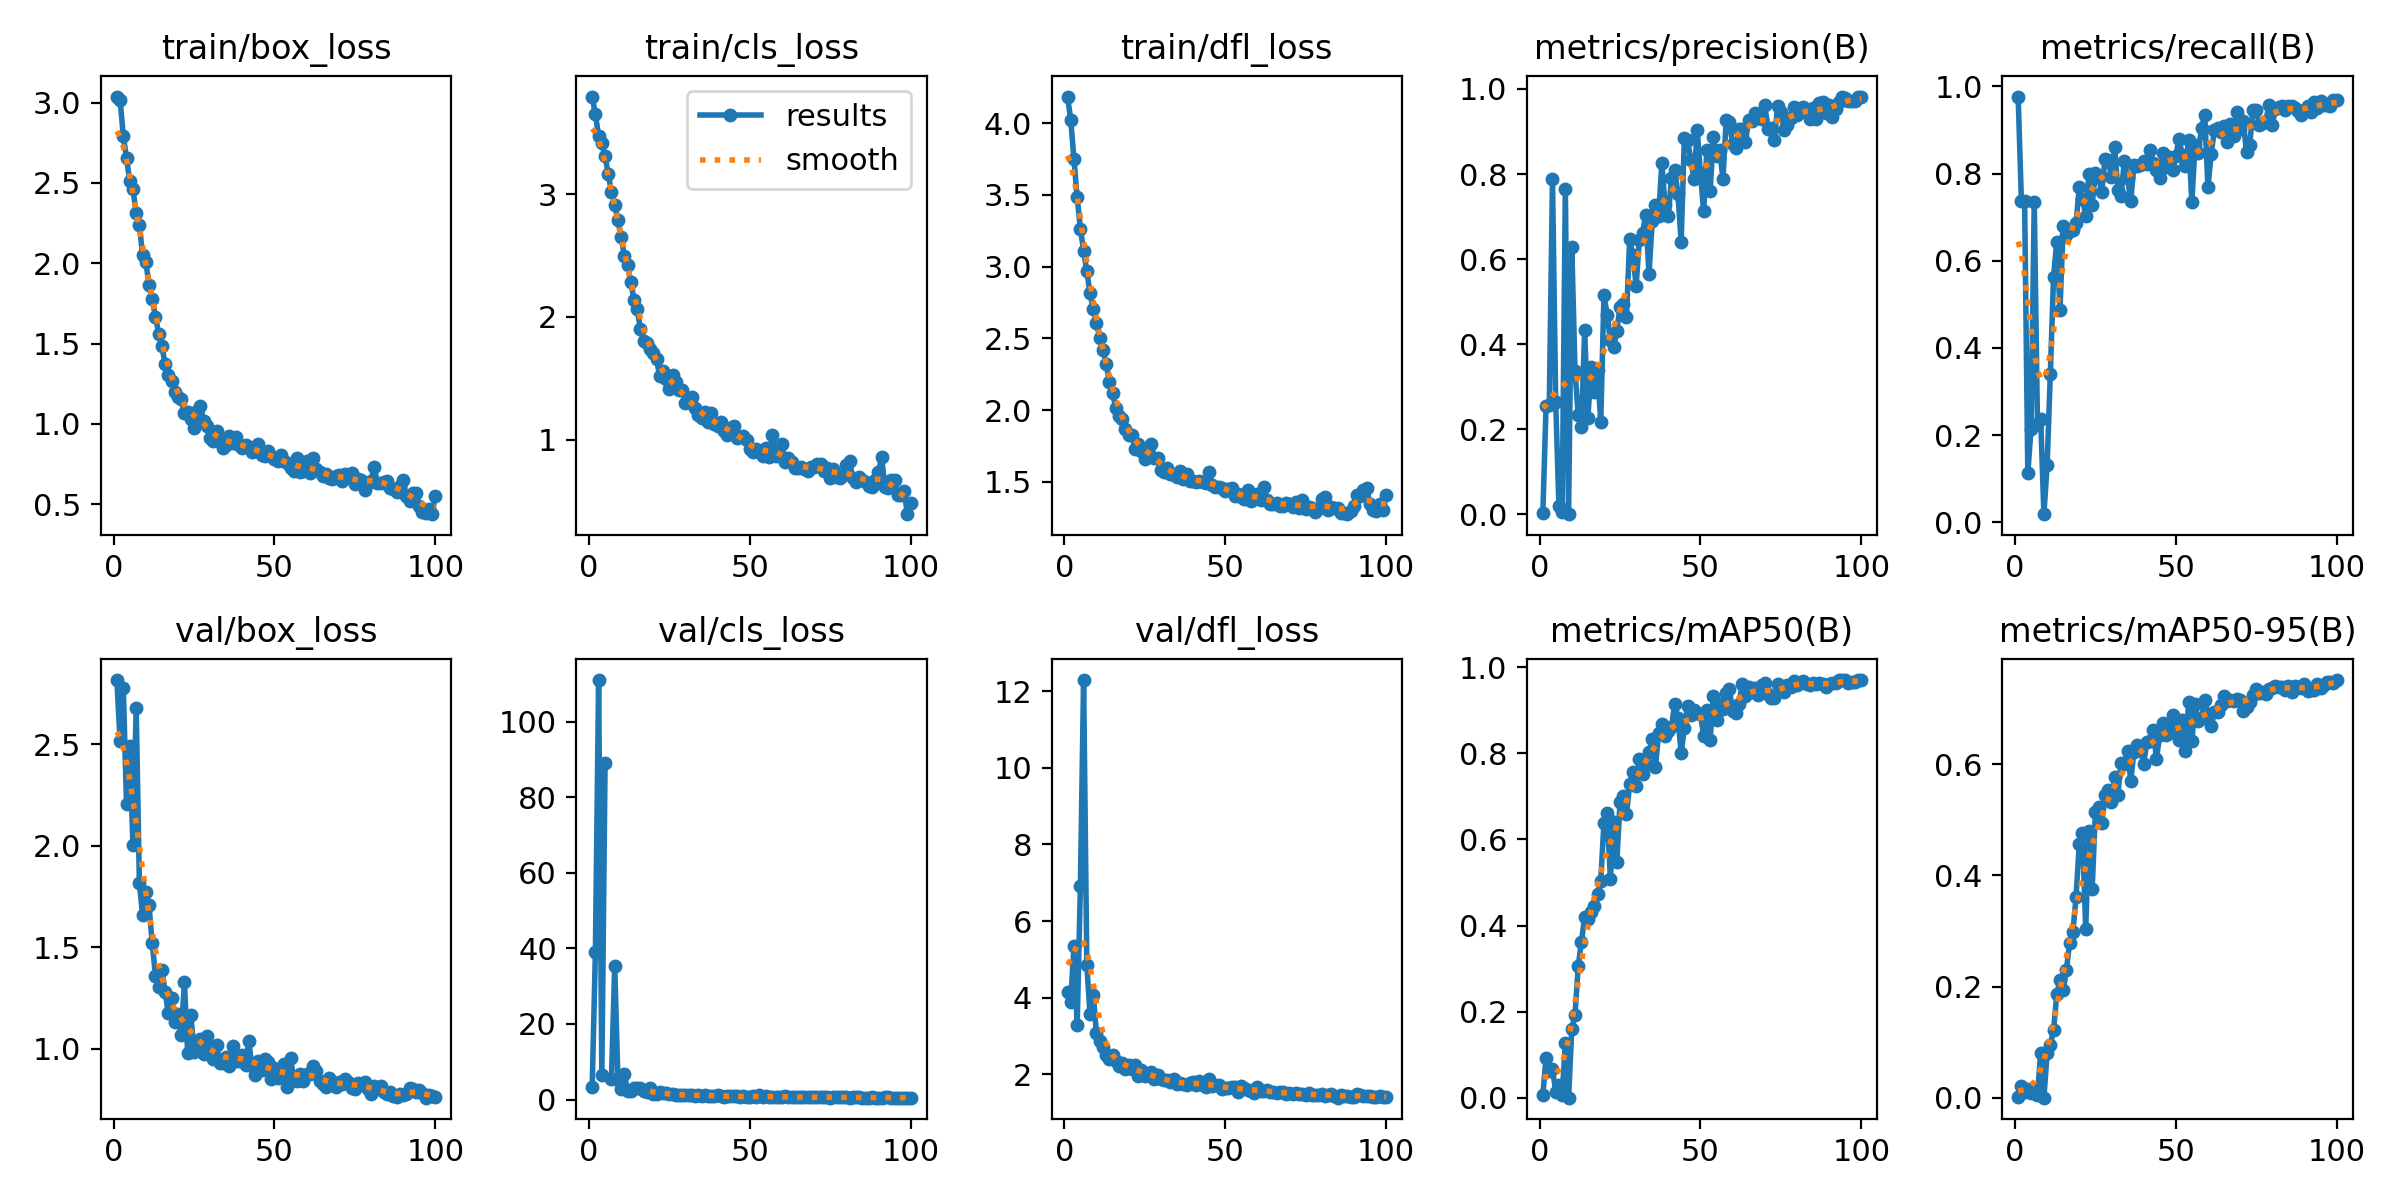

In [12]:
display(Image(filename=f"runs/detect/train/results.png", width=1000))

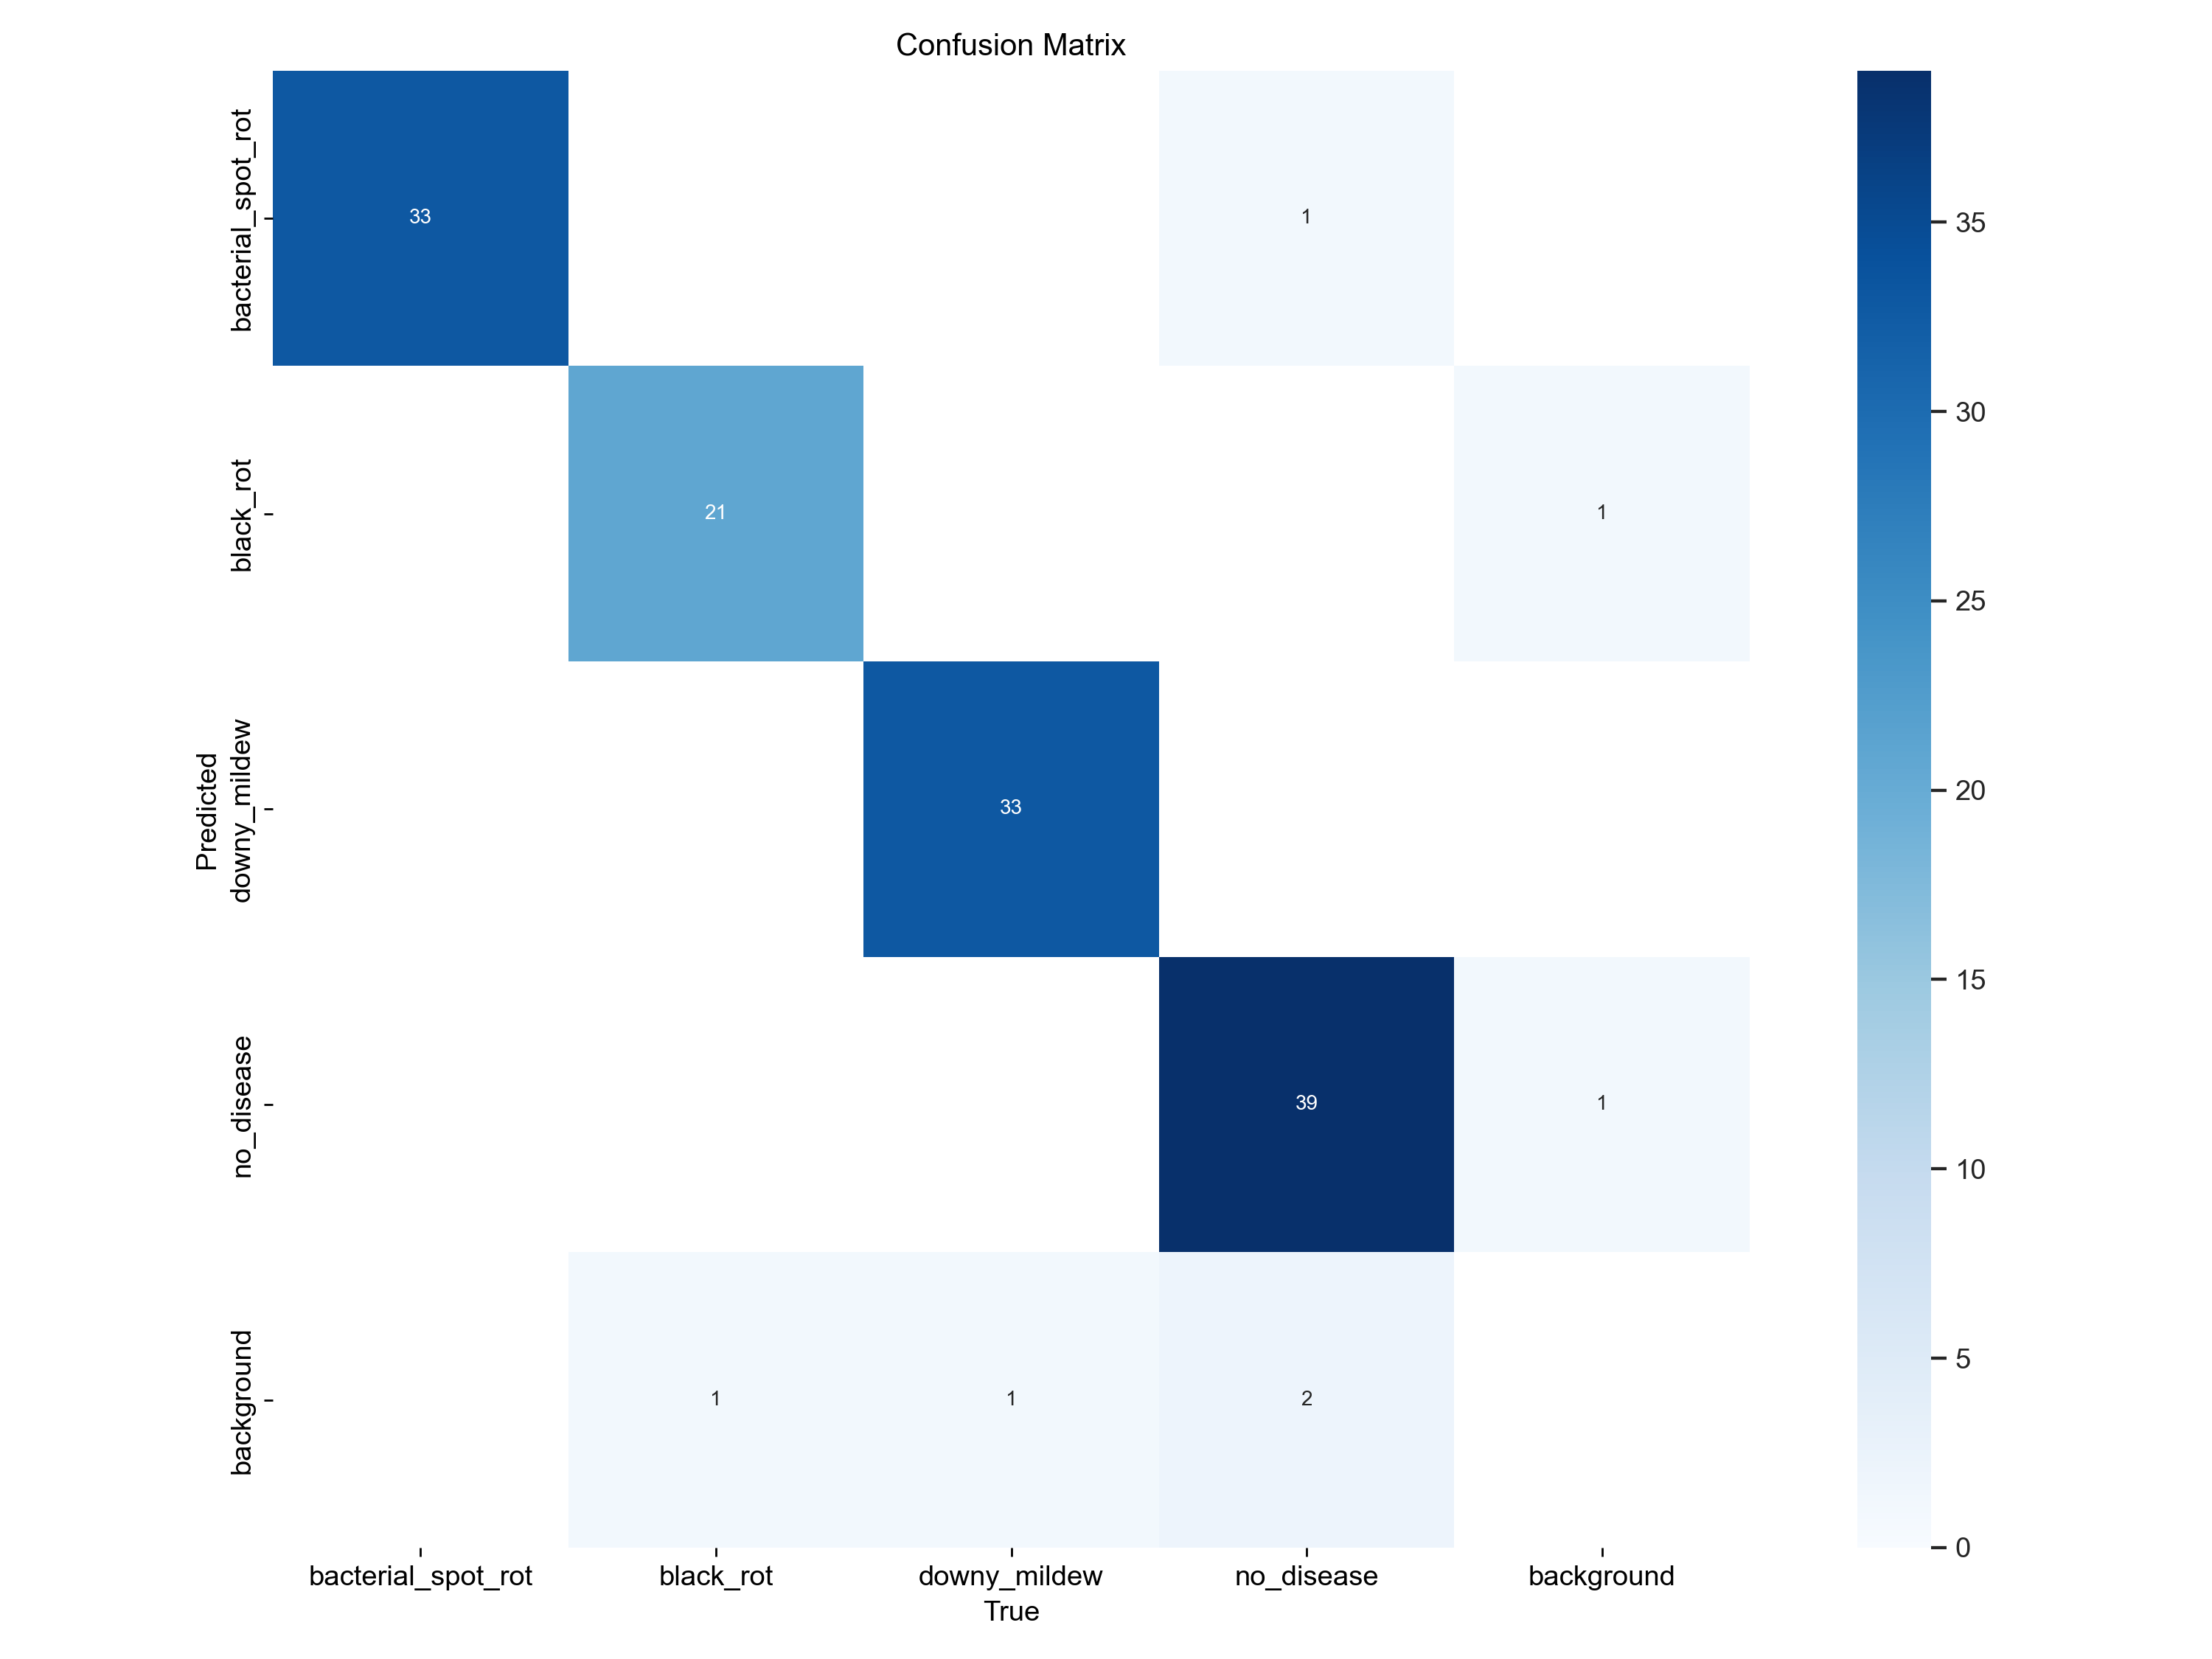

In [13]:
display(Image(filename=f"runs/detect/train/confusion_matrix.png", width=1000))

In [14]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=Cauliflower-Diseases-Recognition-3/test/images

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
YOLOv9c summary (fused): 384 layers, 25,322,332 parameters, 0 gradients, 102.3 GFLOPs

image 1/66 d:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\test\images\Bacterial-Spot_-110-_jpg.rf.9c0cb7762c8796976f91a1540323a203.jpg: 640x640 1 bacterial_spot_rot, 15.5ms
image 2/66 d:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\test\images\Bacterial-Spot_-116-_jpg.rf.204a47dfa7853319f7eb48bbba1c533b.jpg: 640x640 1 bacterial_spot_rot, 10.0ms
image 3/66 d:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\test\images\Bacterial-Spot_-117-_jpg.rf.e20185265bf0c1008fb5f9799684a43e.jpg: 640x640 1 bacterial_spot_rot, 9.9ms
image 4/66 d:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\test\imag

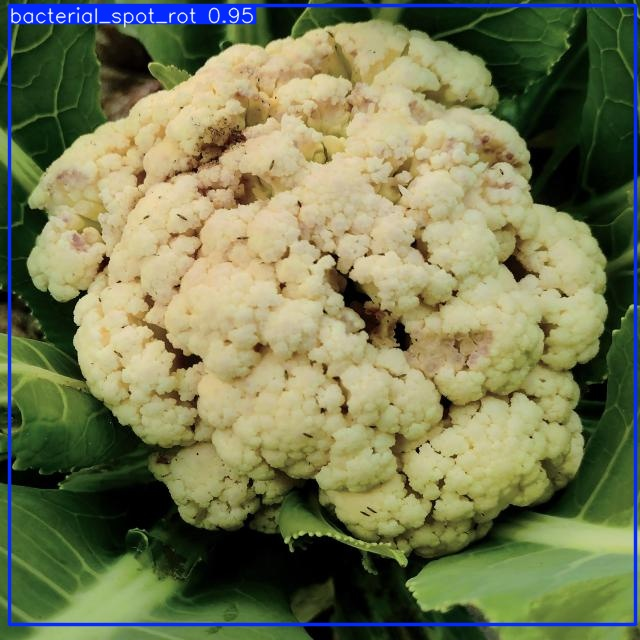

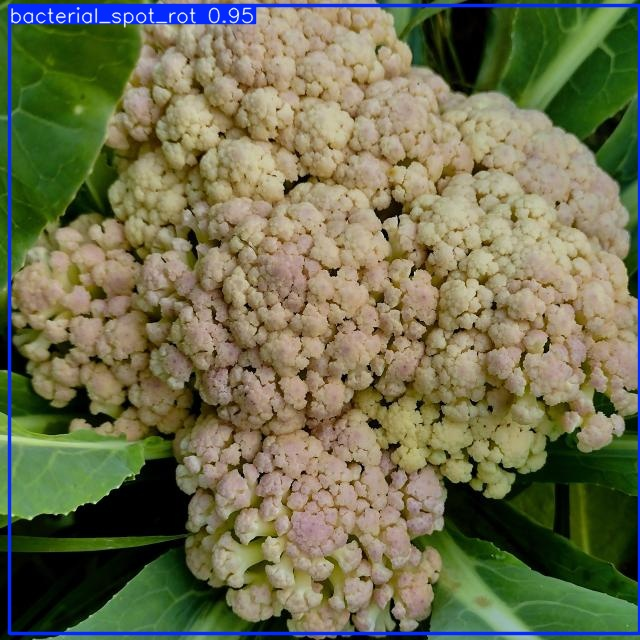

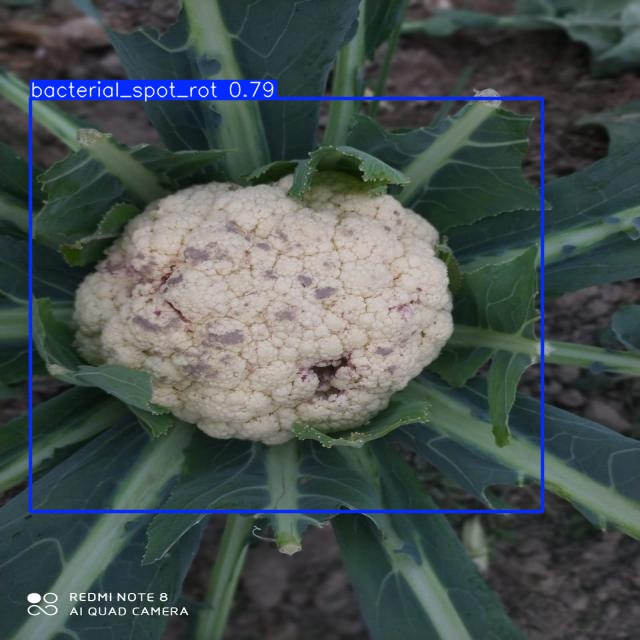

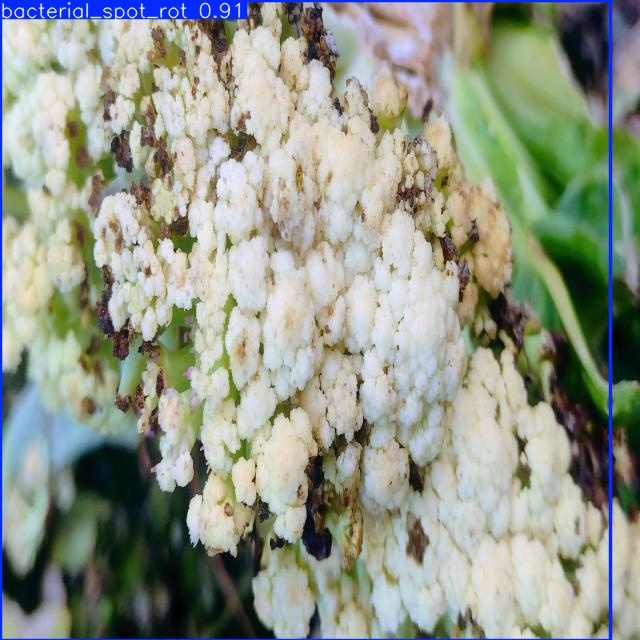

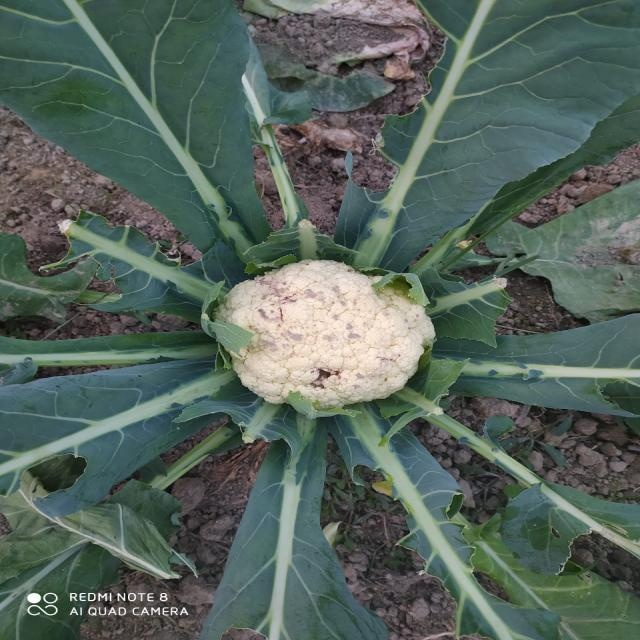

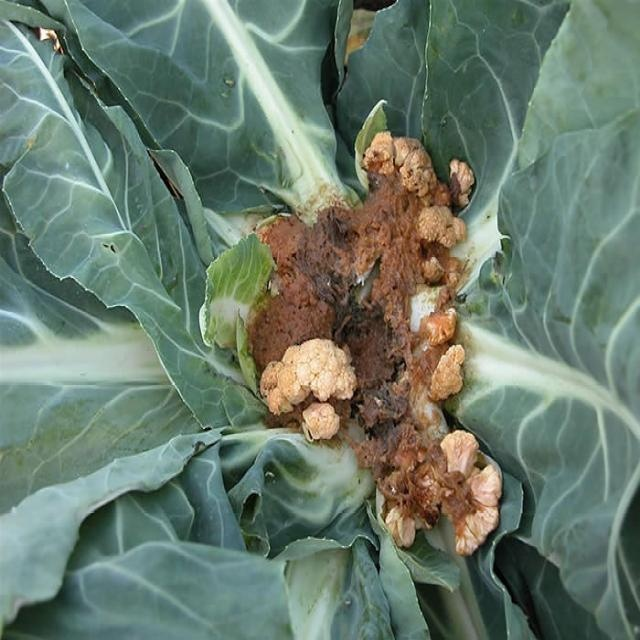

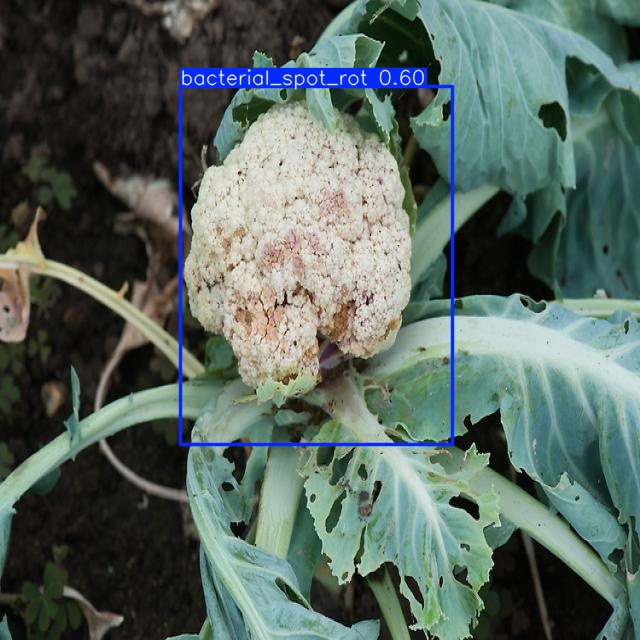

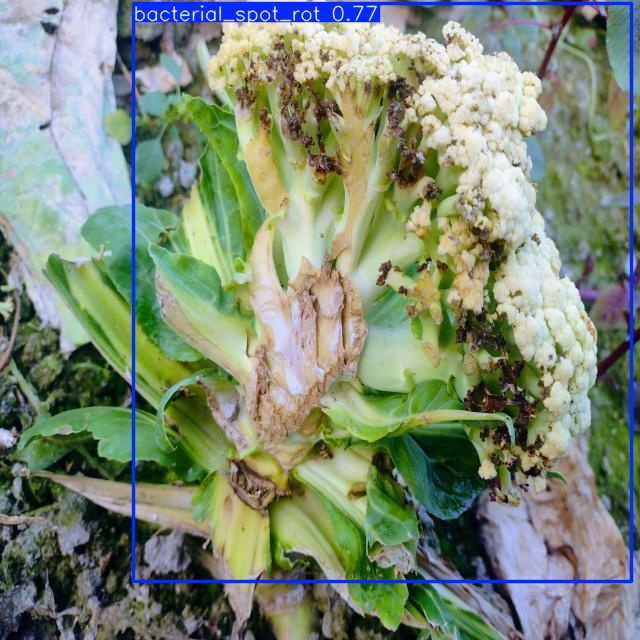

In [15]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display


for imageName in glob.glob("runs/detect/predict/*.jpg")[2:10] :#assuming JPG
    print("\n")
    display(Image(filename=imageName))

# YOLOV11

In [16]:
!yolo task=detect mode=train model=yolo11s.pt data=Cauliflower-Diseases-Recognition-3/data.yaml epochs=30 imgsz=640 plots=True


FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.179 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=Cauliflower-Diseases-Recognition-3/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer


train: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\train\labels.cache... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]
train: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\train\labels.cache... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]

val: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
val: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]
       1/30       4.3G      1.257      5.038       1.86         41        640:   0%|          | 0/29 [00:01<?, ?it/s]
       1/30       4.3G      1.257      5.038    

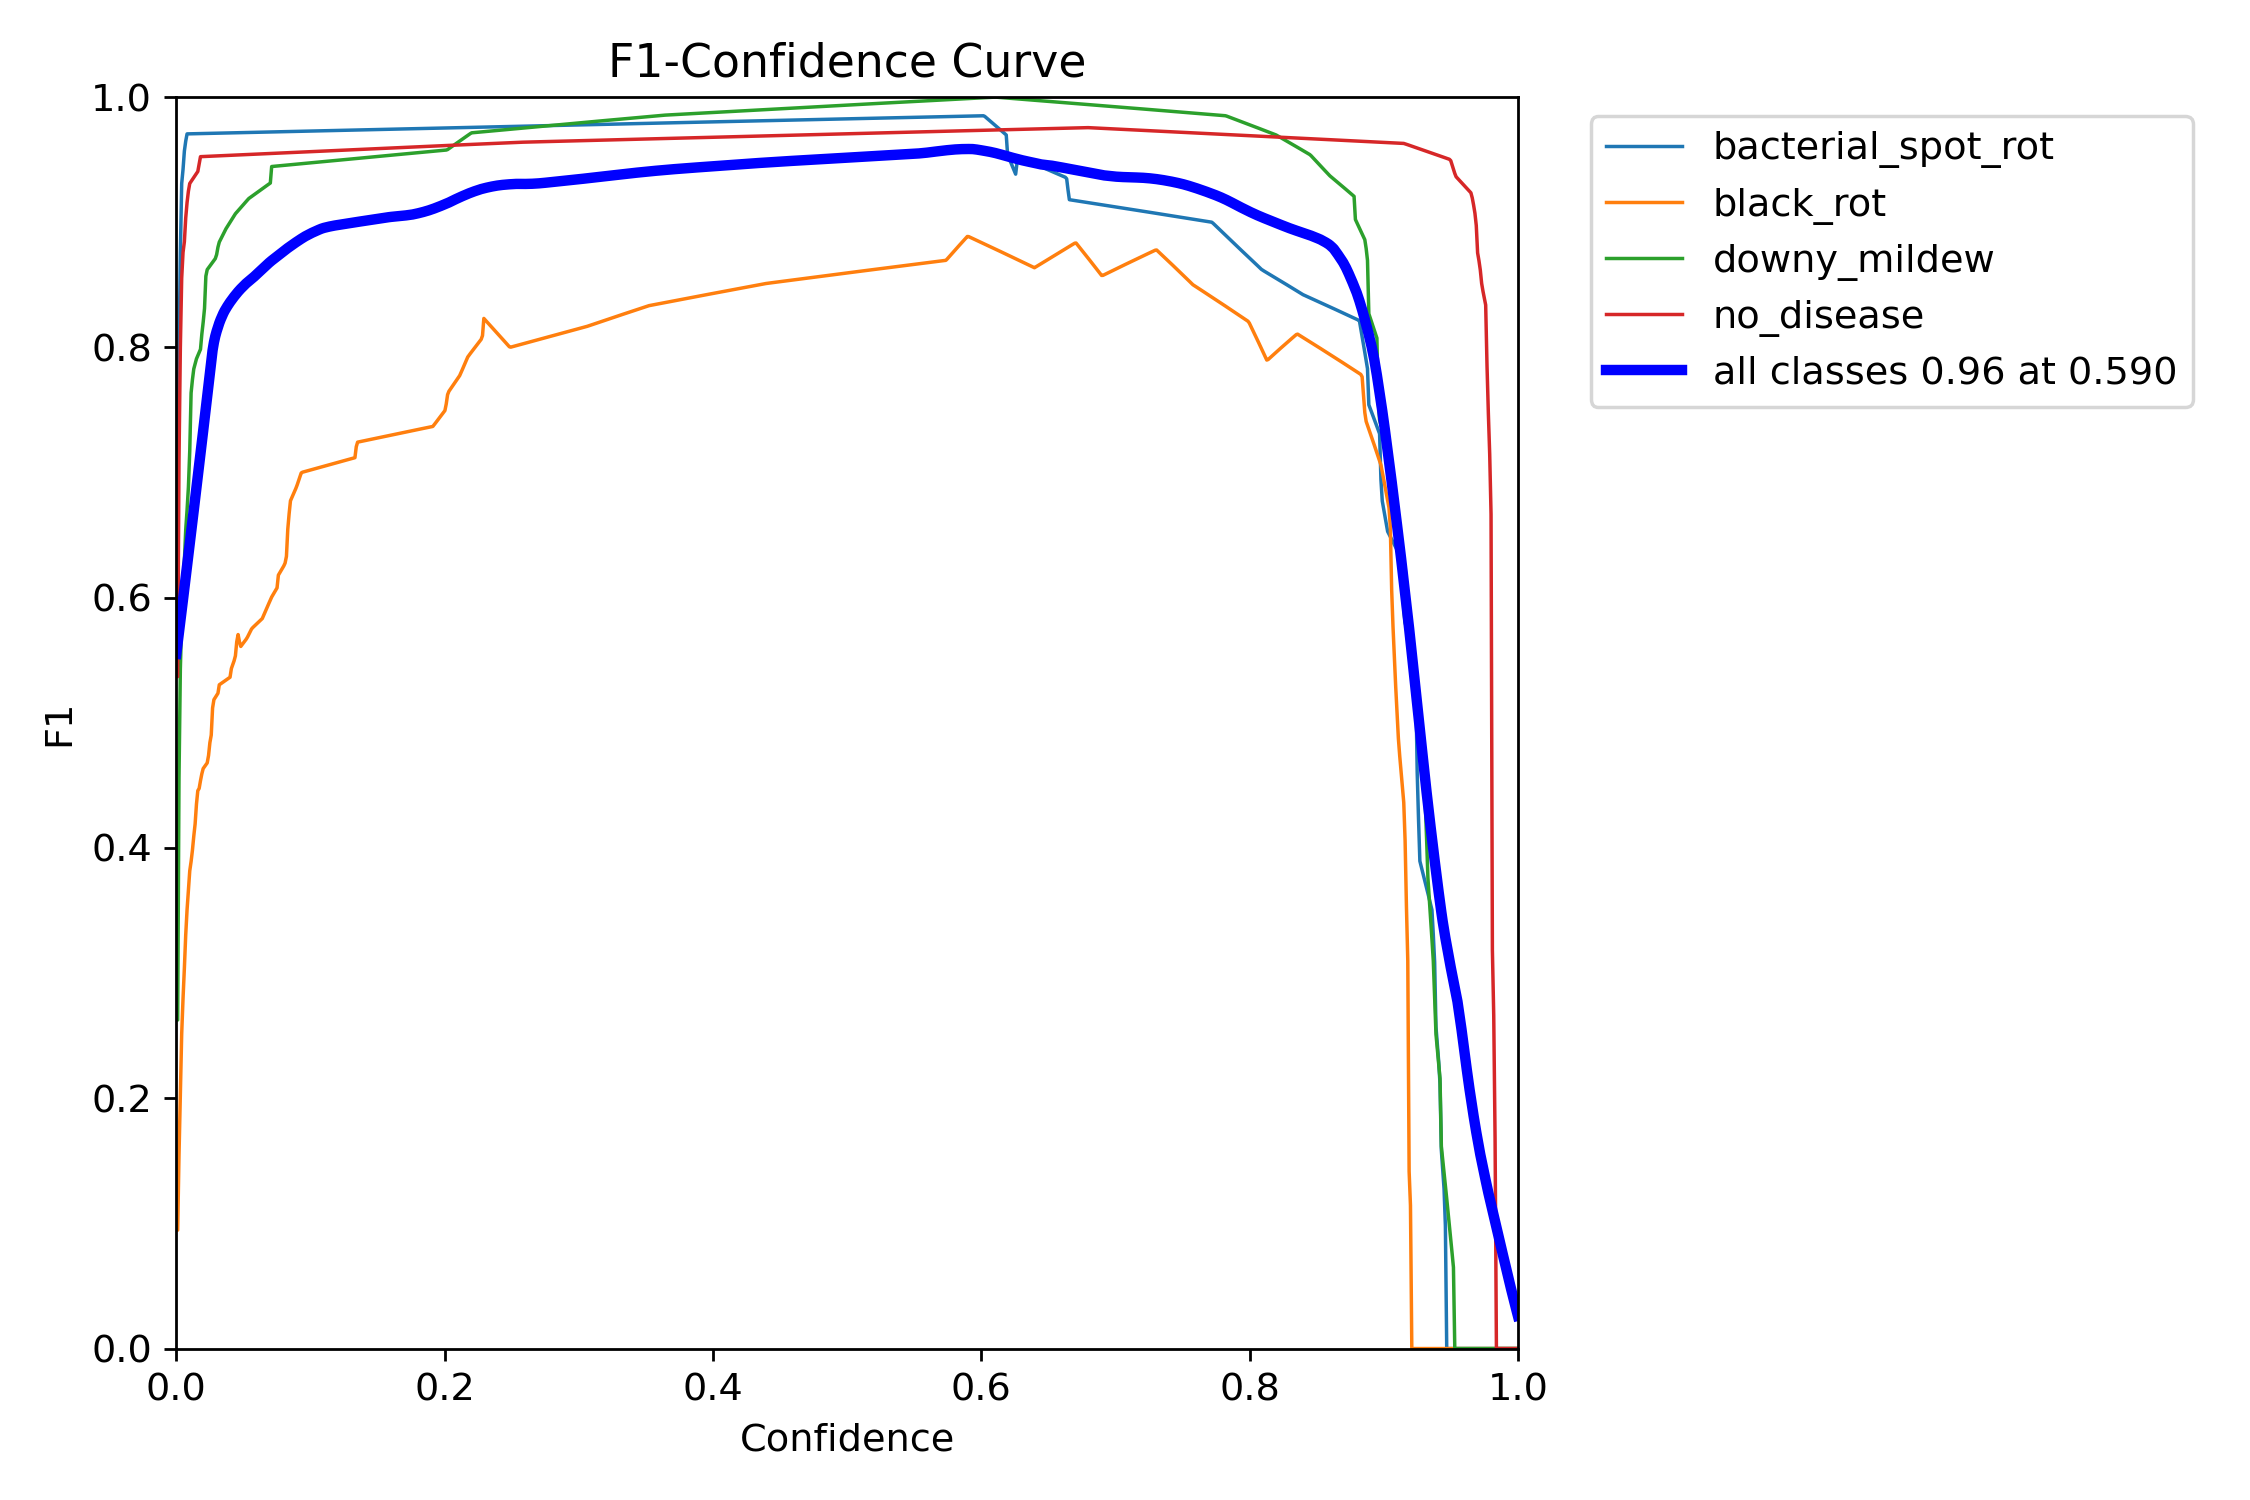

In [17]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train2/F1_curve.png', width=600)

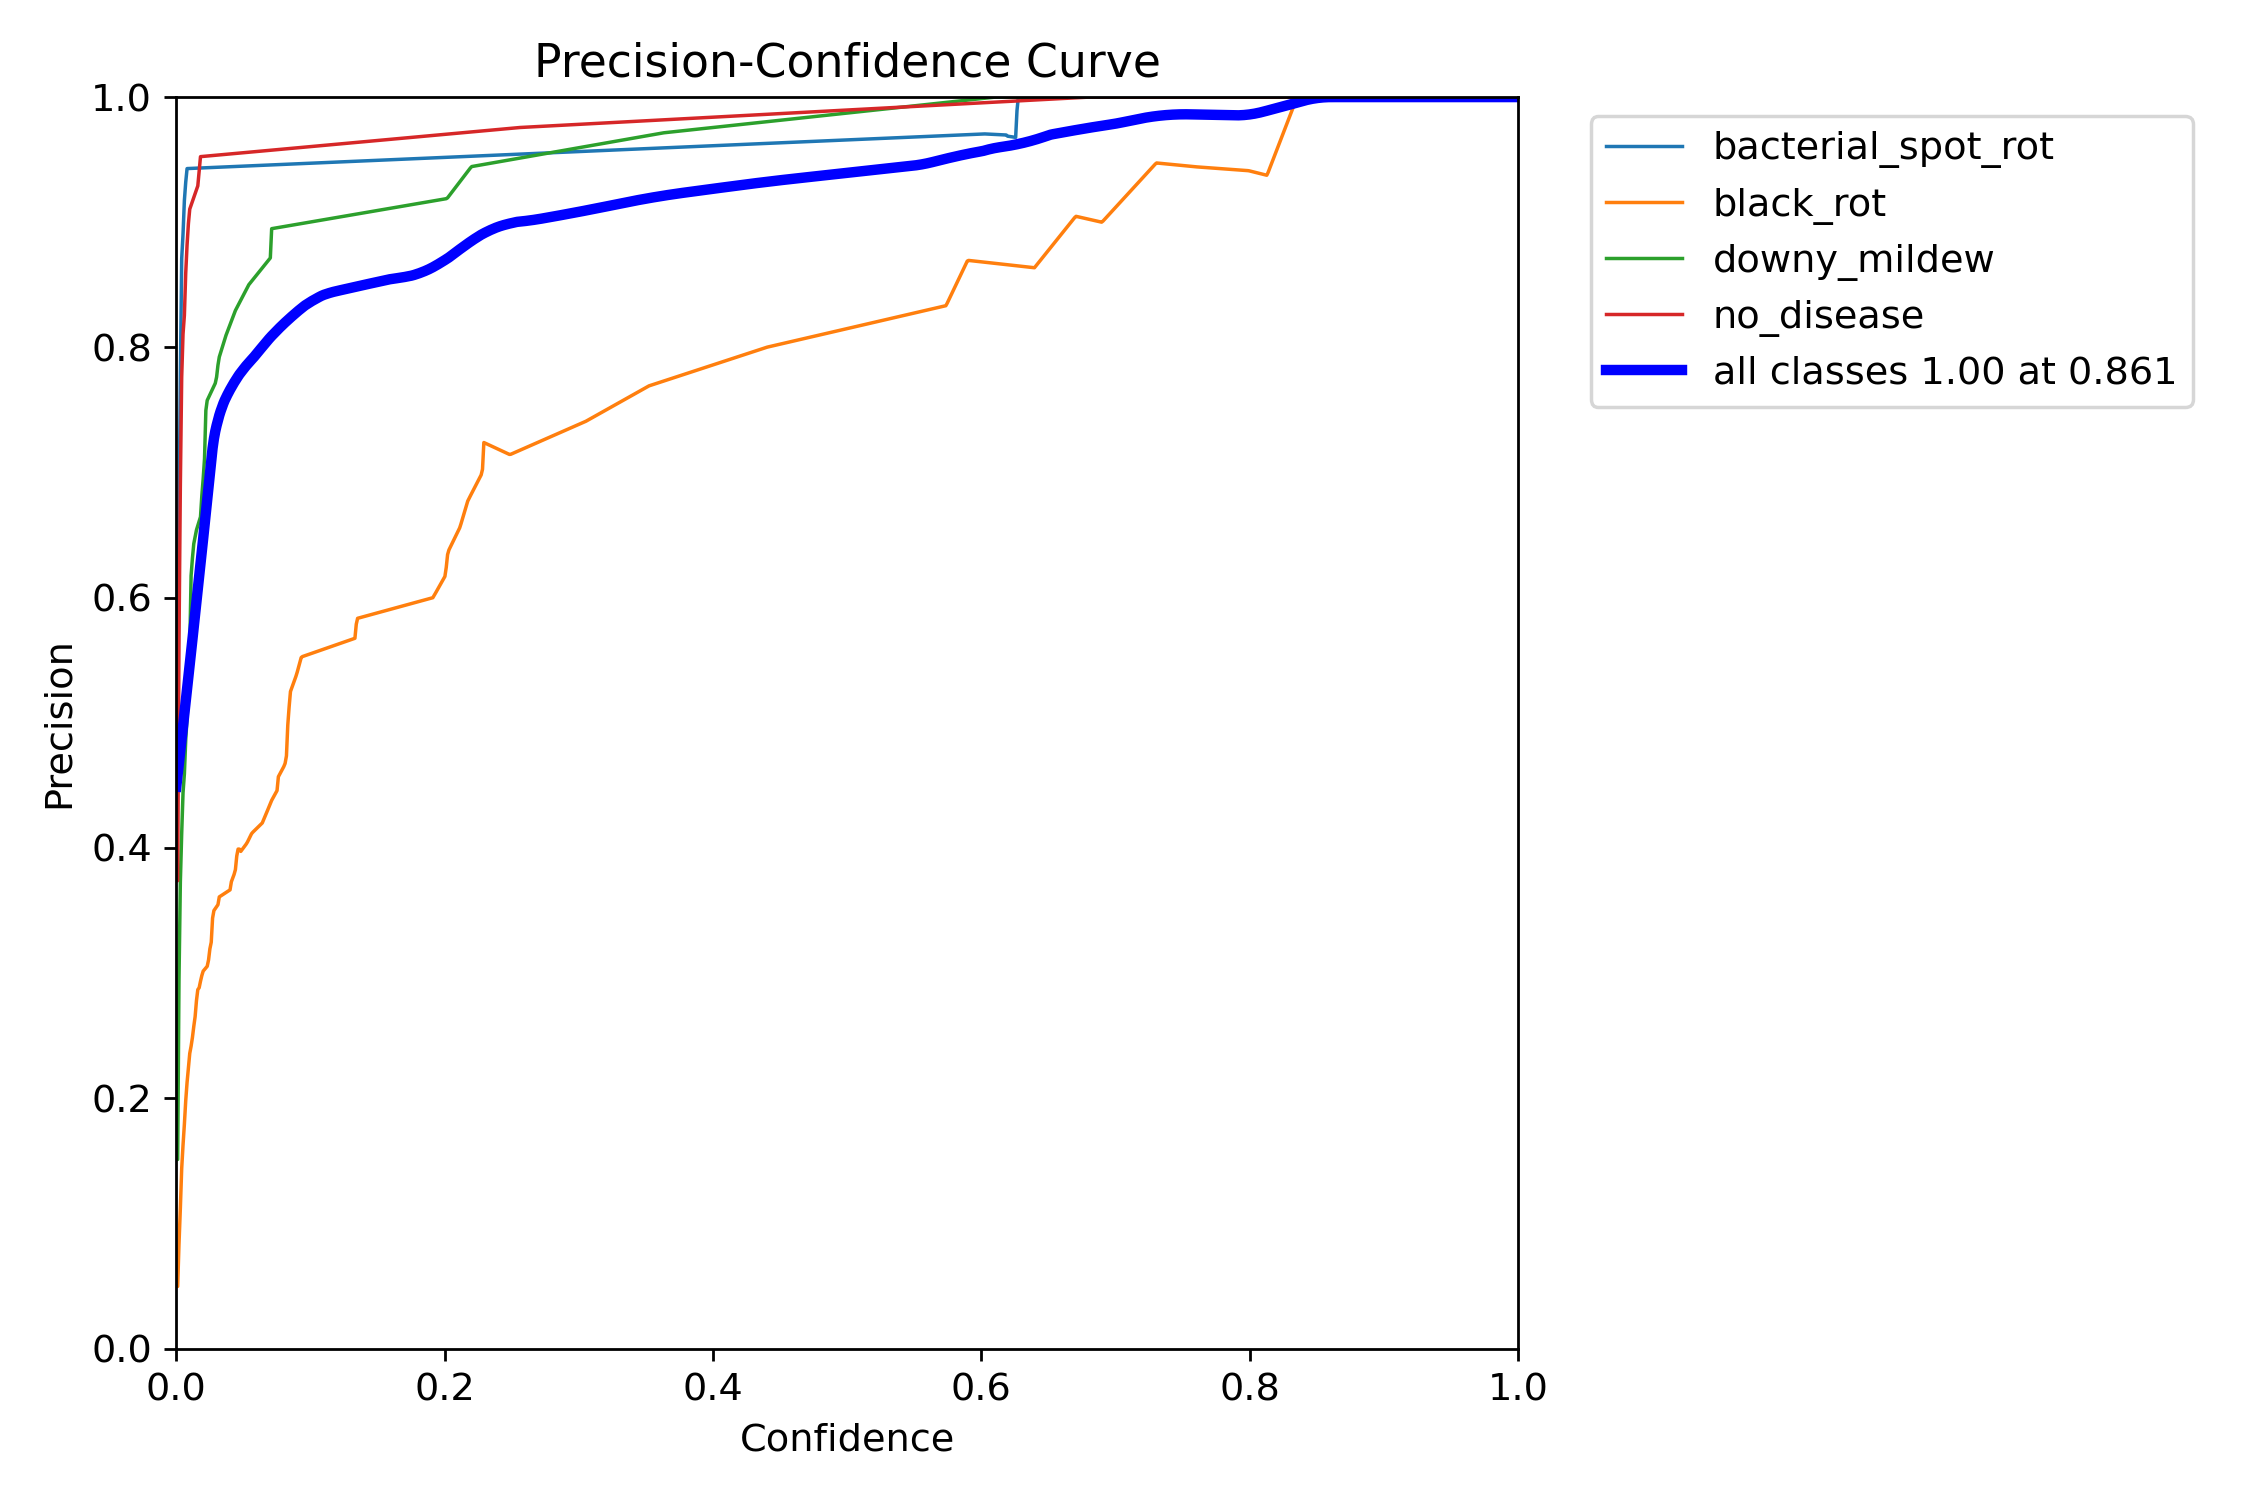

In [18]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train2/P_curve.png', width=600)

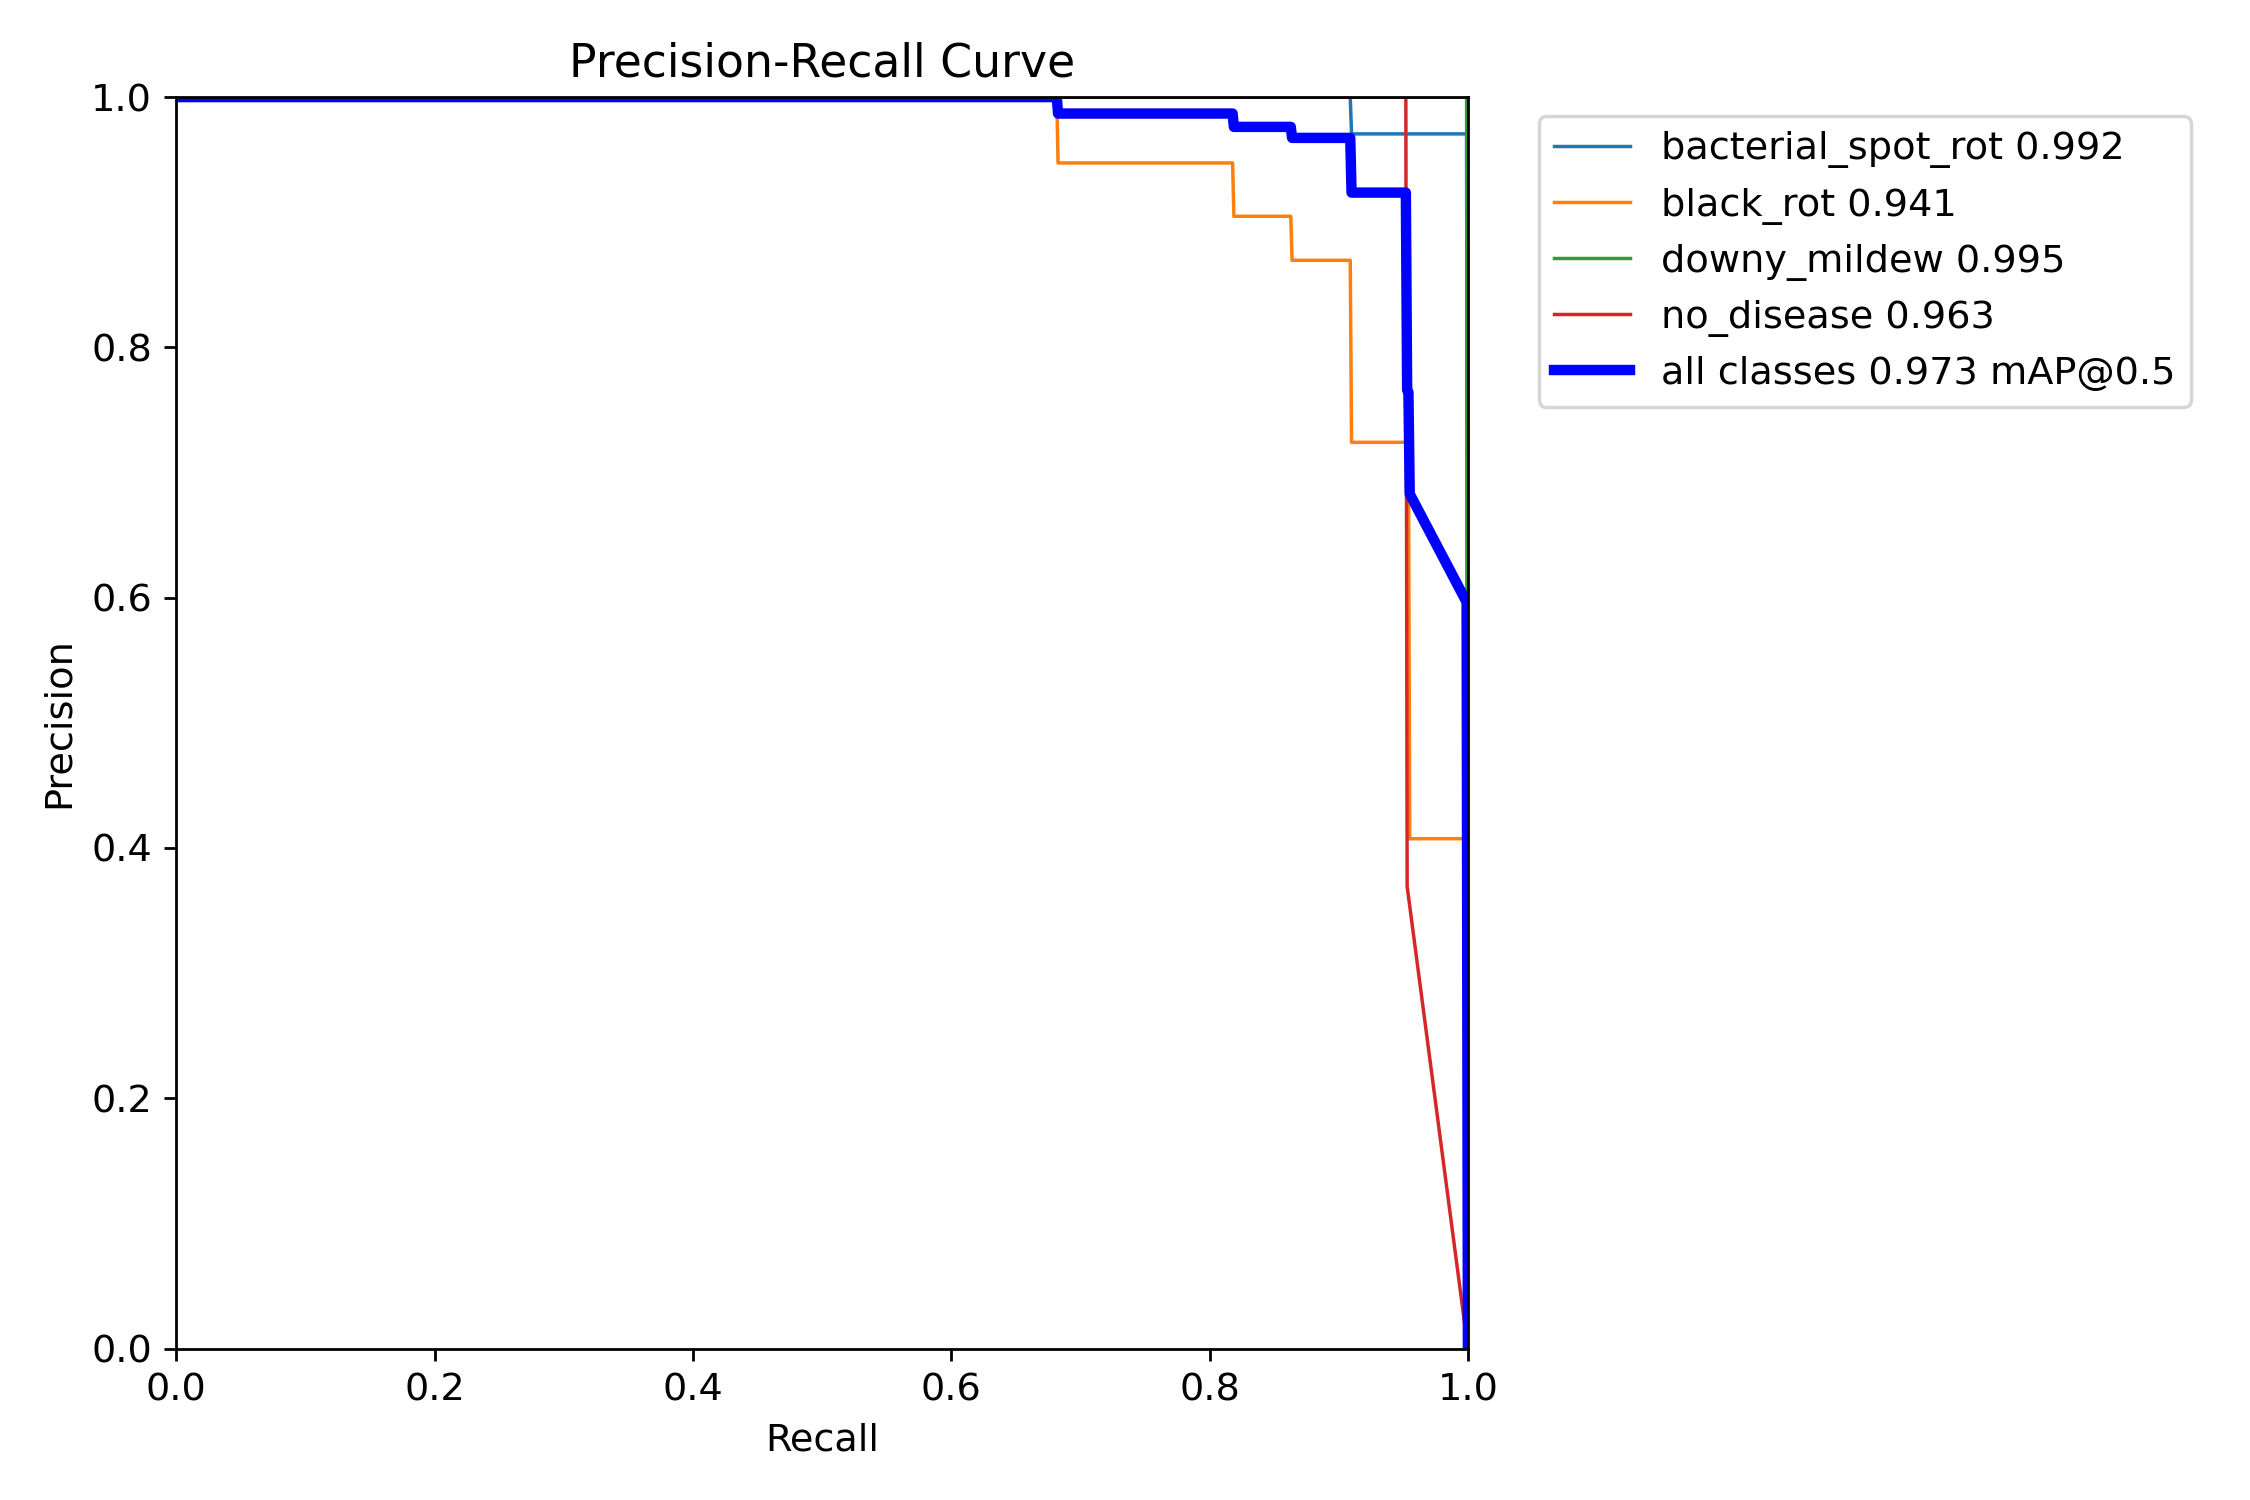

In [19]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train2/PR_curve.png', width=600)

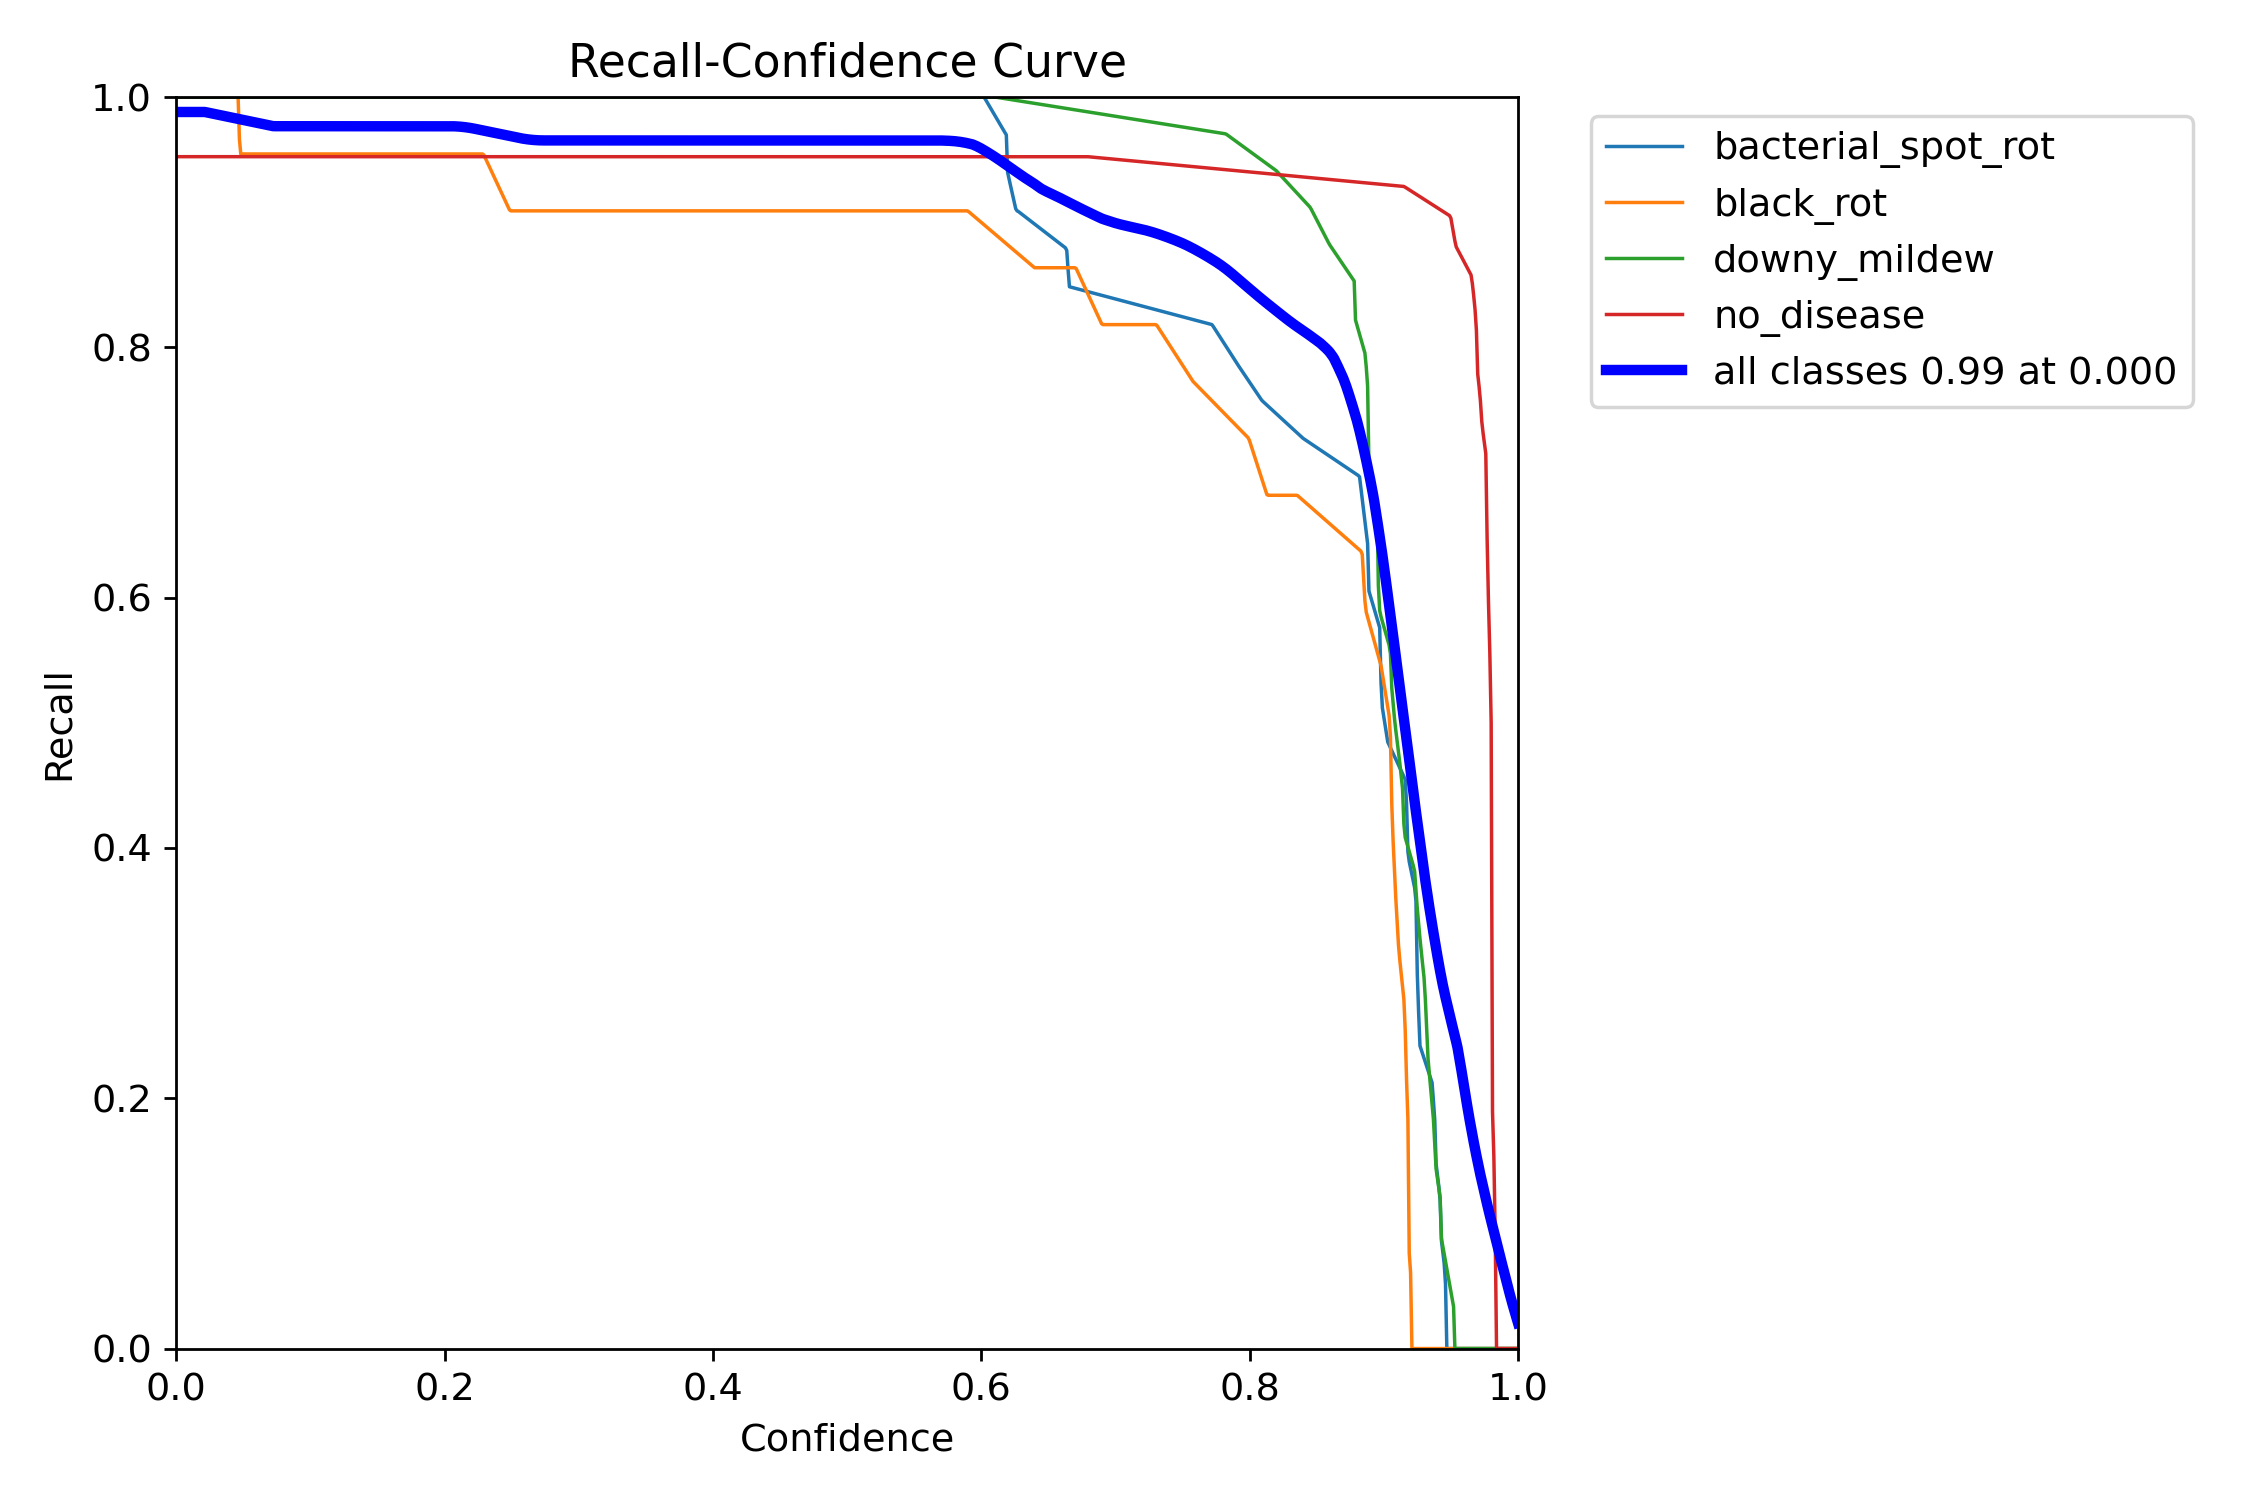

In [20]:
IPyImage(filename='runs/detect/train2/R_curve.png', width=600)

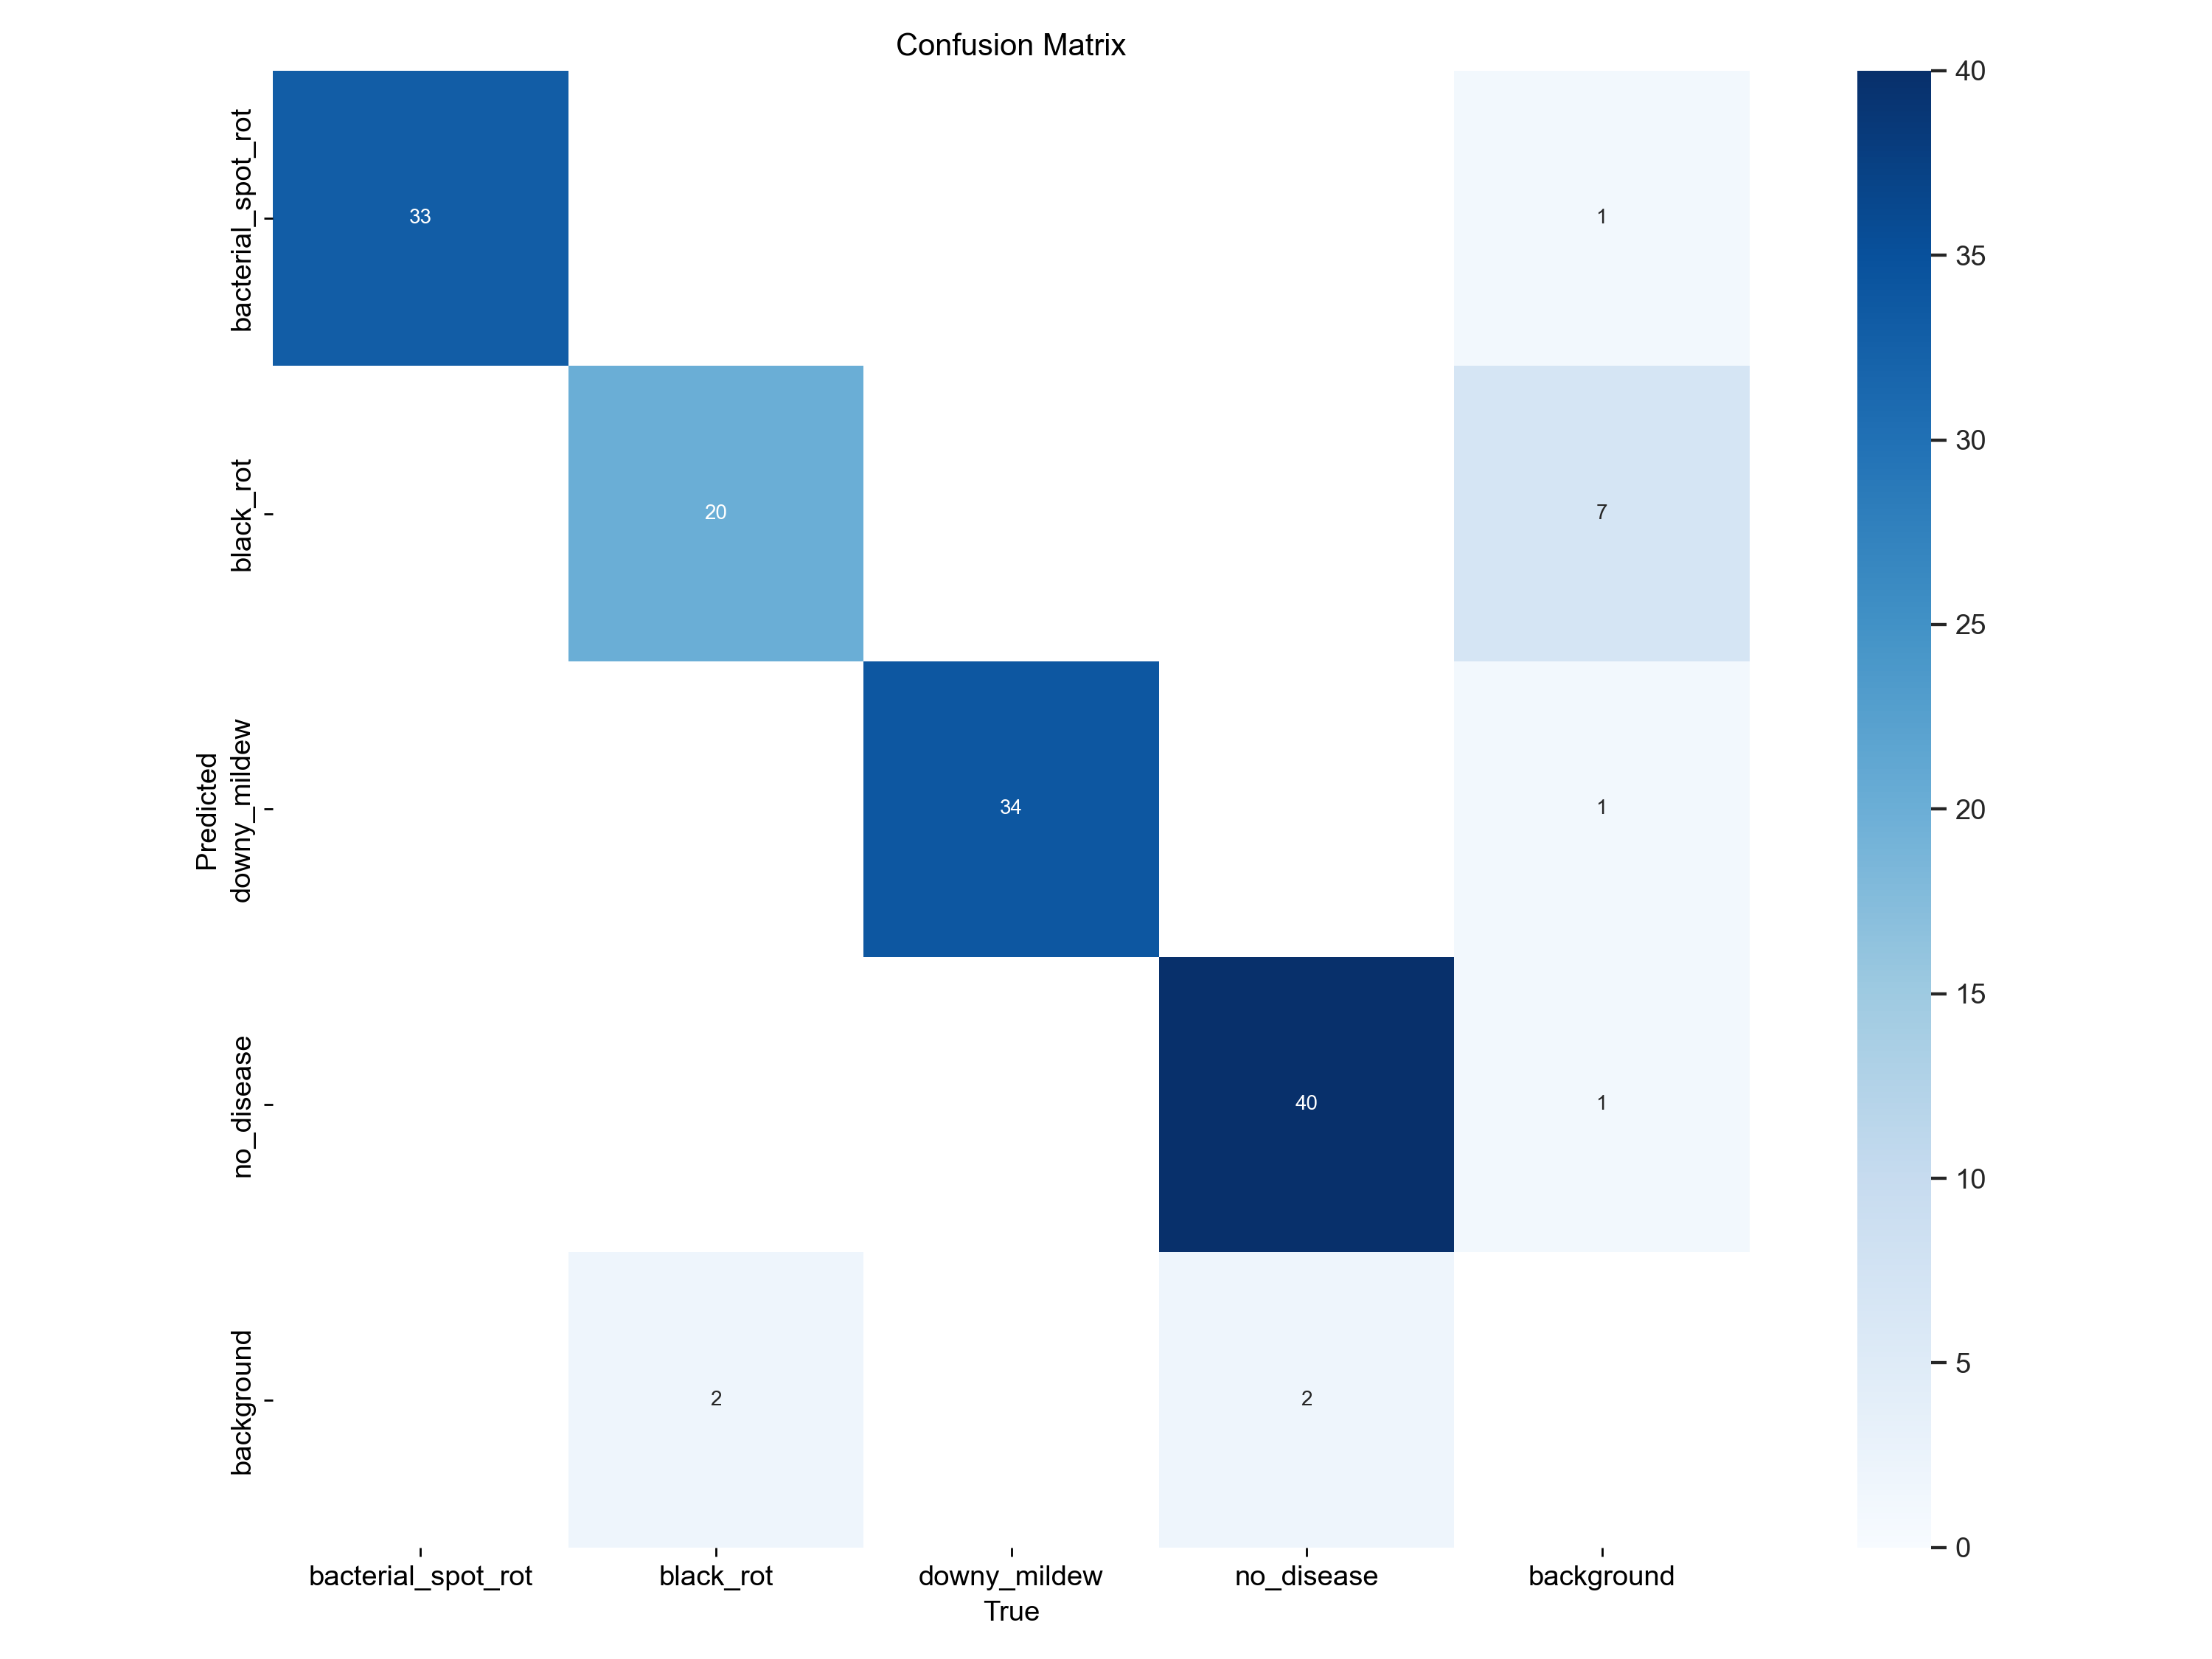

In [21]:
IPyImage(filename='runs/detect/train2/confusion_matrix.png', width=600)

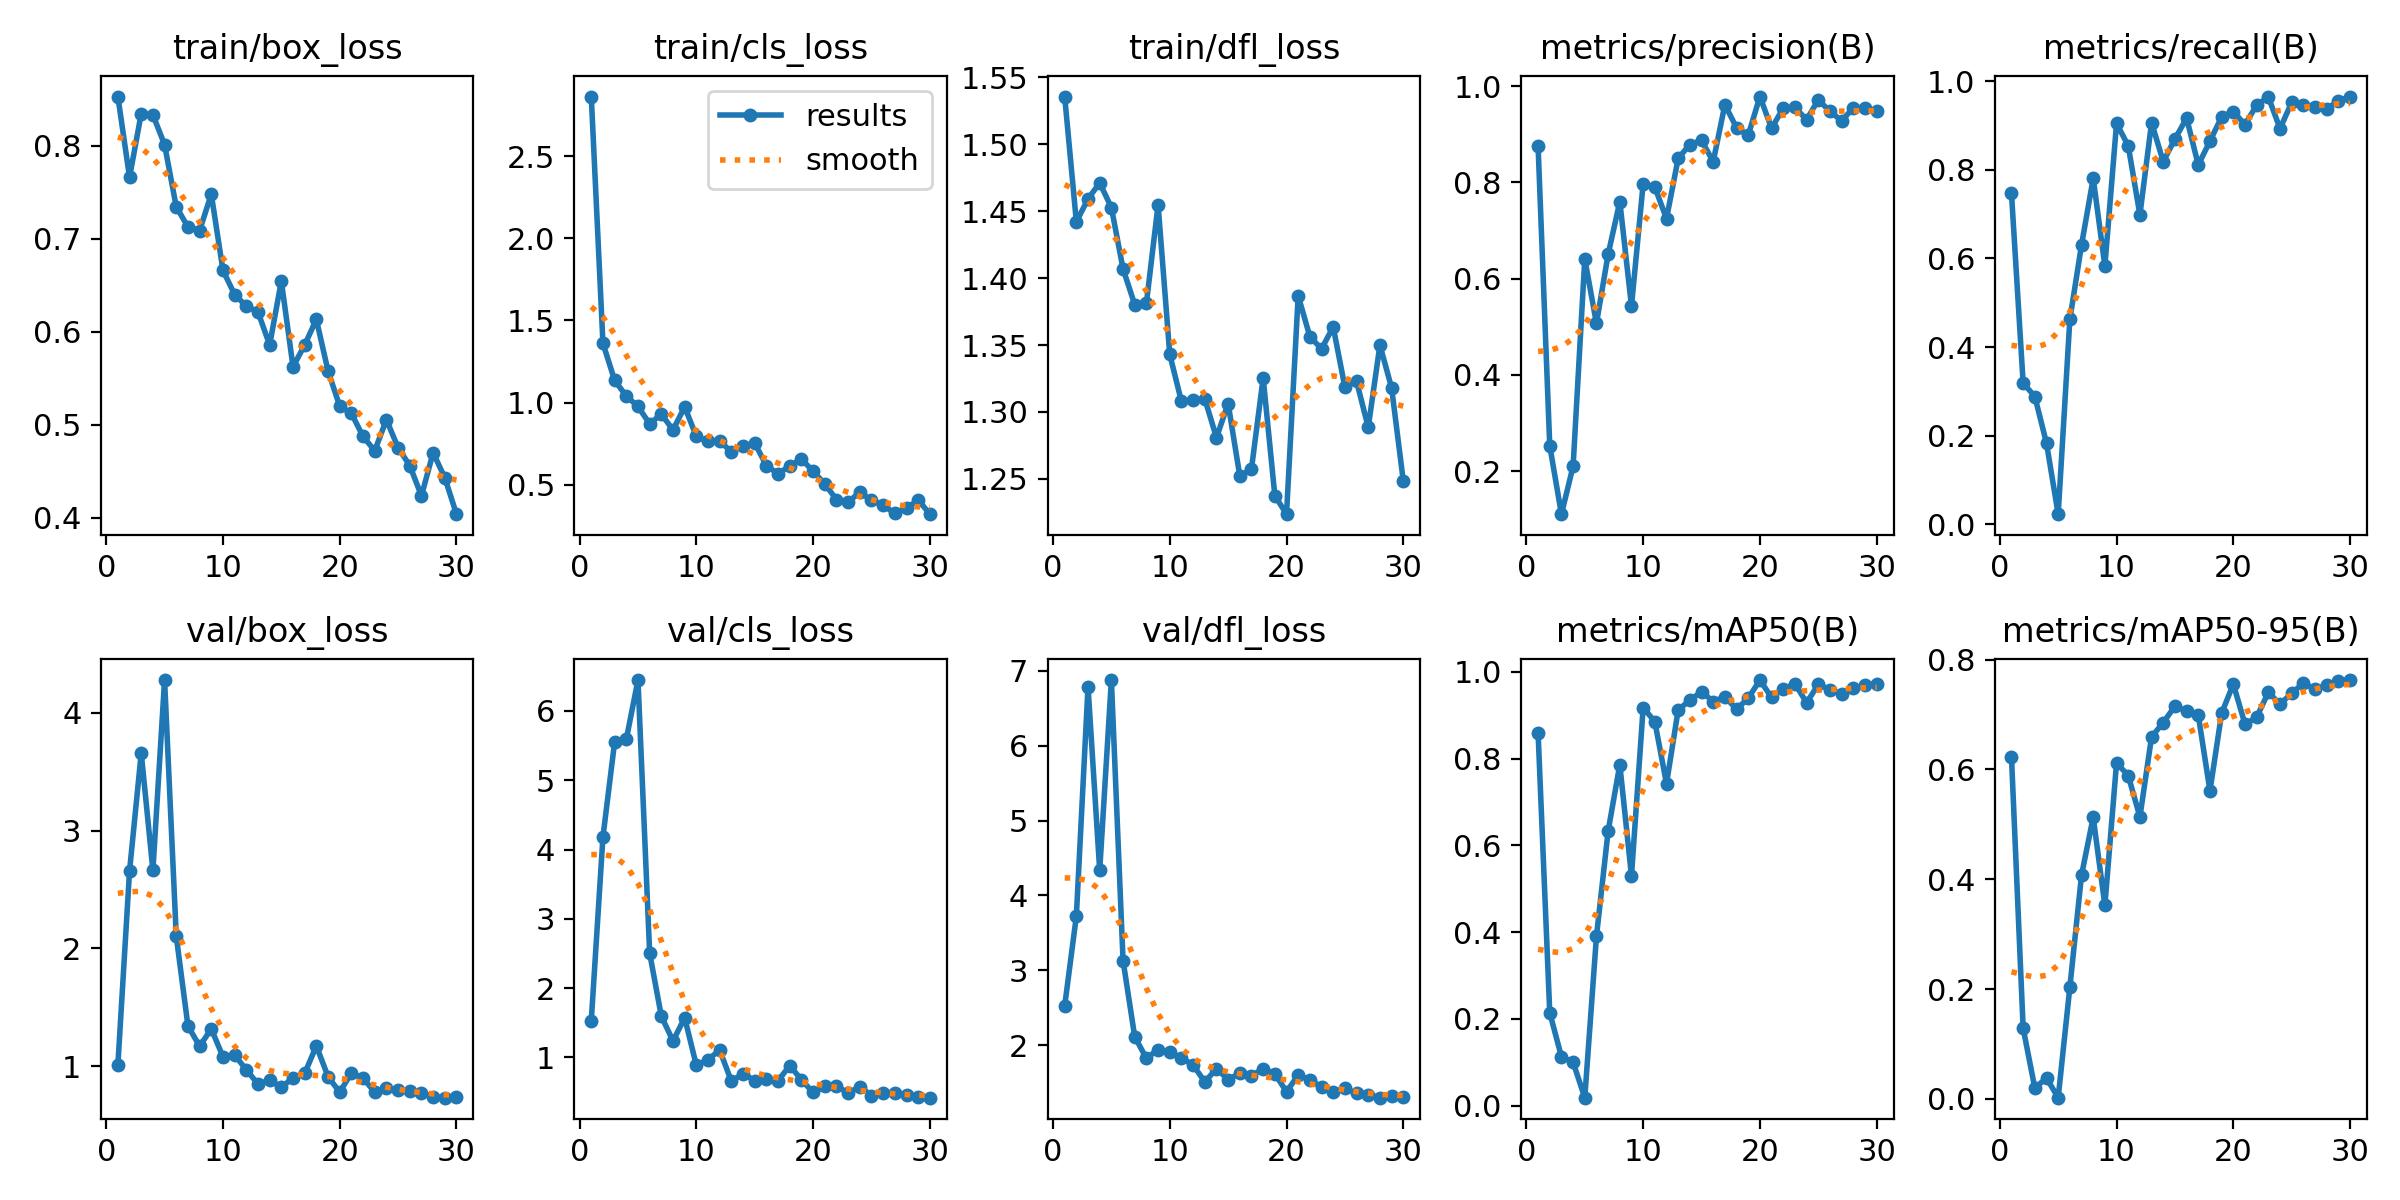

In [22]:
IPyImage(filename='runs/detect/train2/results.png', width=600)

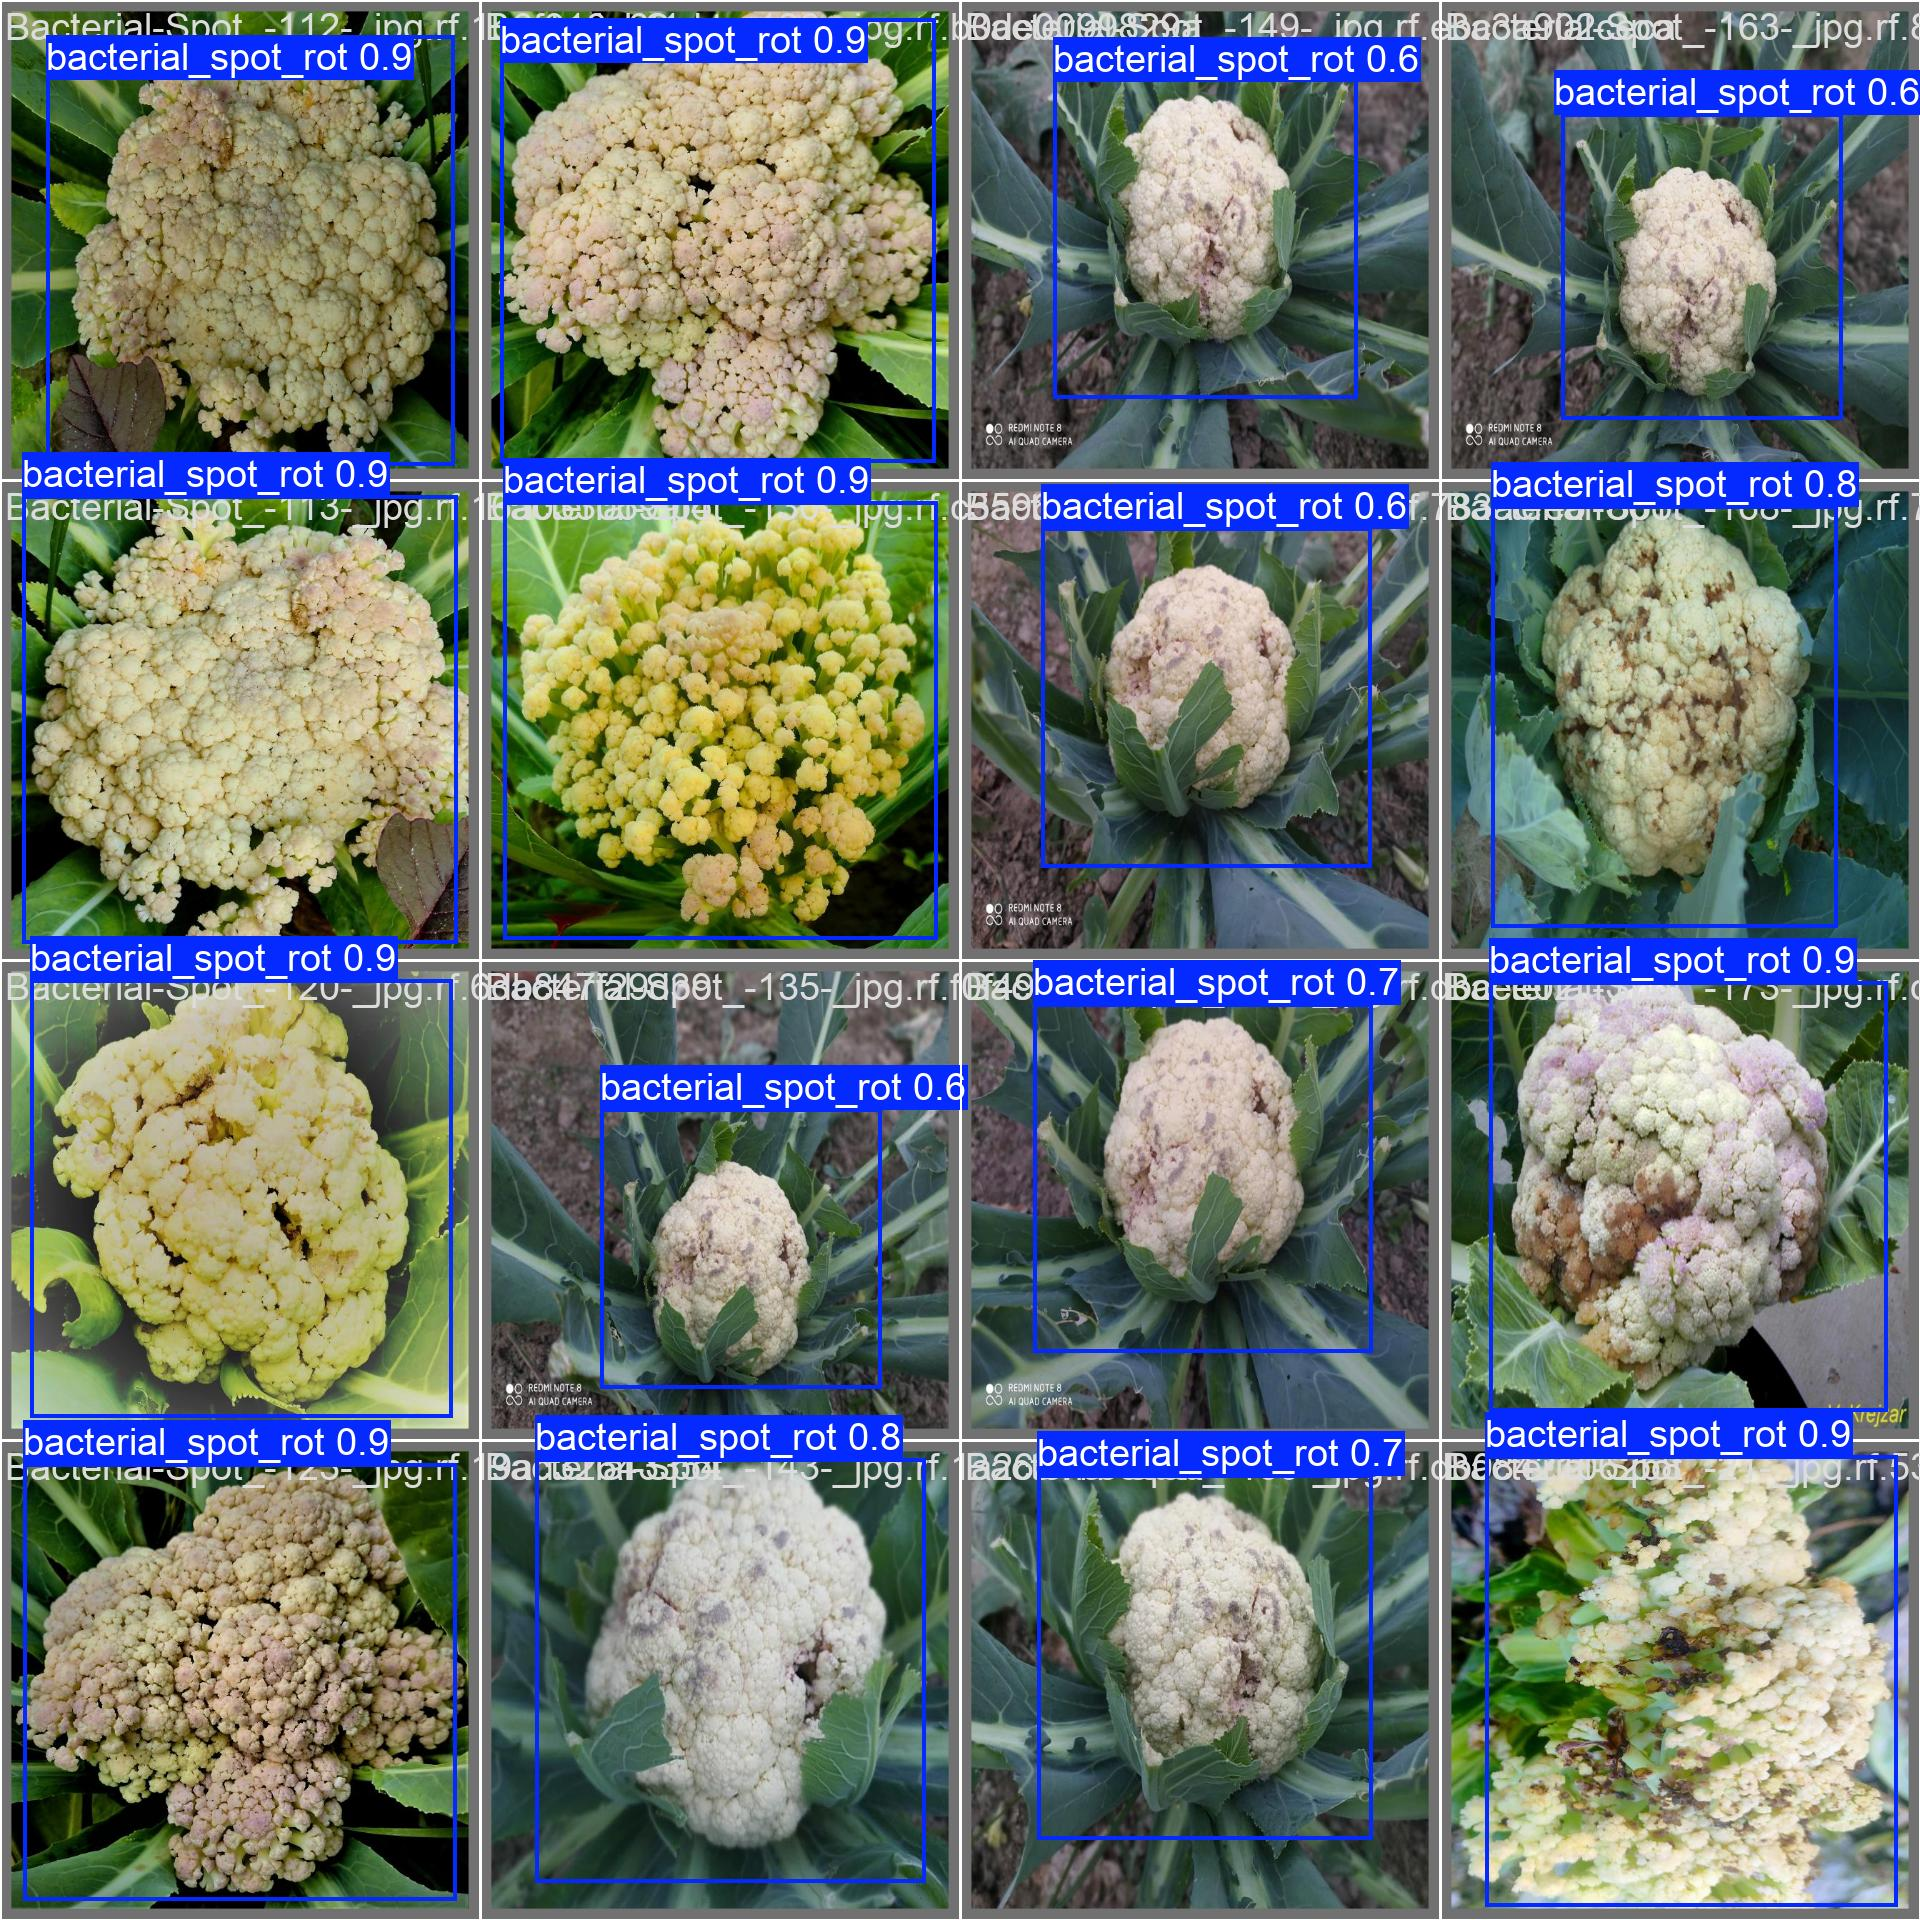

In [23]:
IPyImage(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

In [24]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=Cauliflower-Diseases-Recognition-3/data.yaml

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
FlashAttention is not available on this device. Using scaled_dot_product_attenti


val: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
val: Scanning D:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:00<00:01,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:00<00:01,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 3/8 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R  

In [25]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=Cauliflower-Diseases-Recognition-3/test/images save=True

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.10.16 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/66 d:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\test\images\Bacterial-Spot_-110-_jpg.rf.9c0cb7762c8796976f91a1540323a203.jpg: 640x640 1 bacterial_spot_rot, 9.8ms
image 2/66 d:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\test\images\Bacterial-Spot_-116-_jpg.rf.204a47dfa7853319f7eb48bbba1c533b.jpg: 640x640 1 bacterial_spot_rot, 1 black_rot, 9.9ms
image 3/66 d:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\test\images\Bacterial-Spot_-117-_jpg.rf.e20185265bf0c1008fb5f9799684a43e.jpg: 640x640 1 bacterial_spot_rot, 0.0ms
image 4/66 d:\Cauliflower Disease Detection\CODE\BACKEND\Cauliflower-Diseases-Recognition-3\

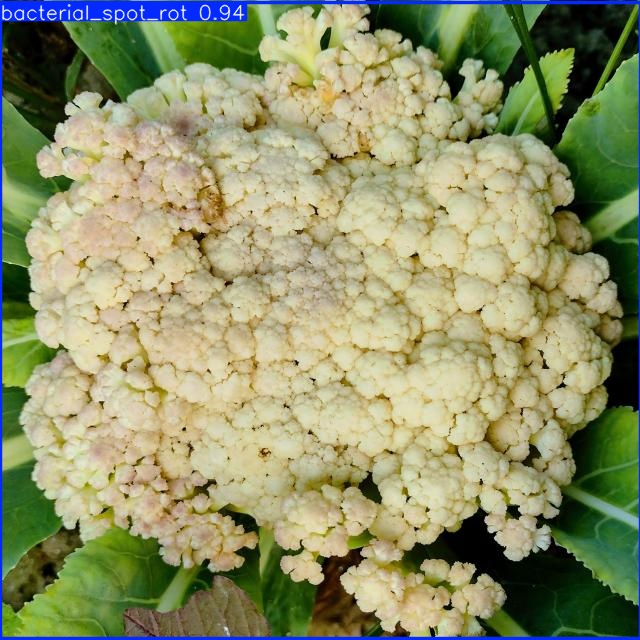

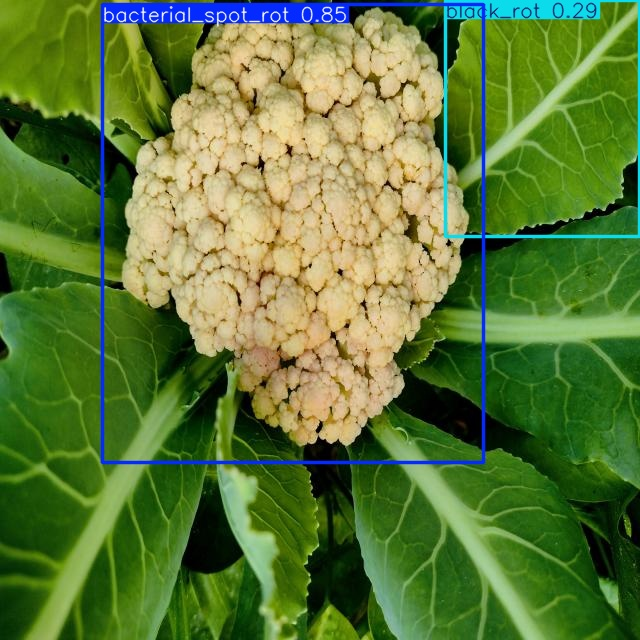

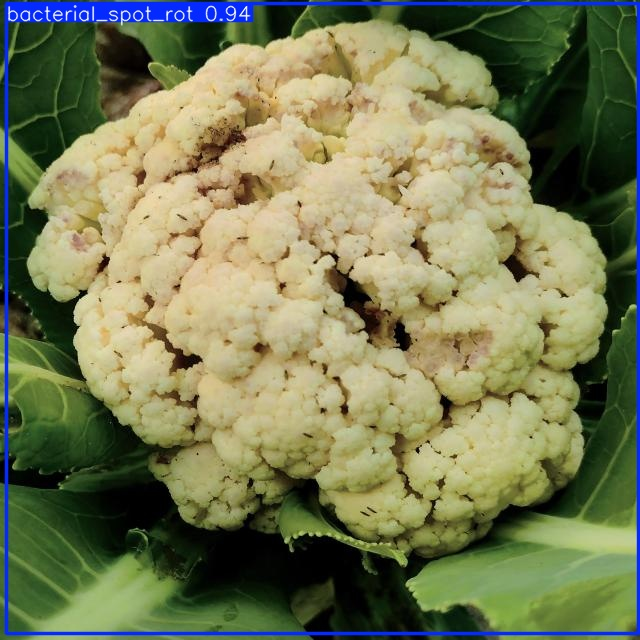

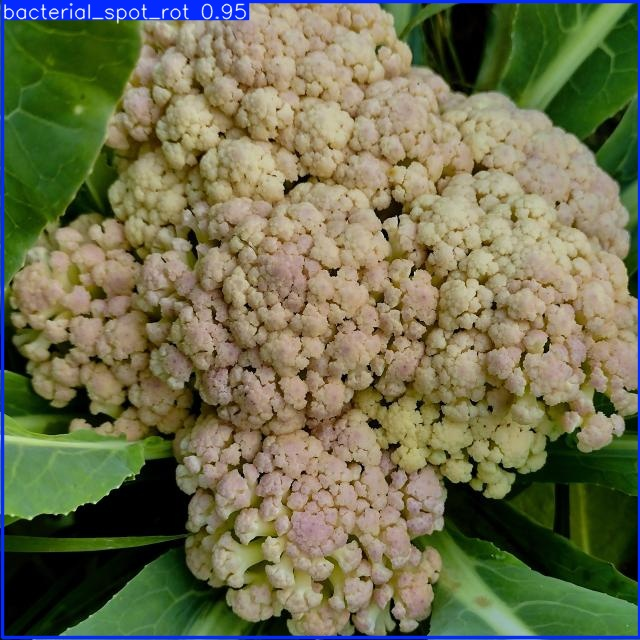

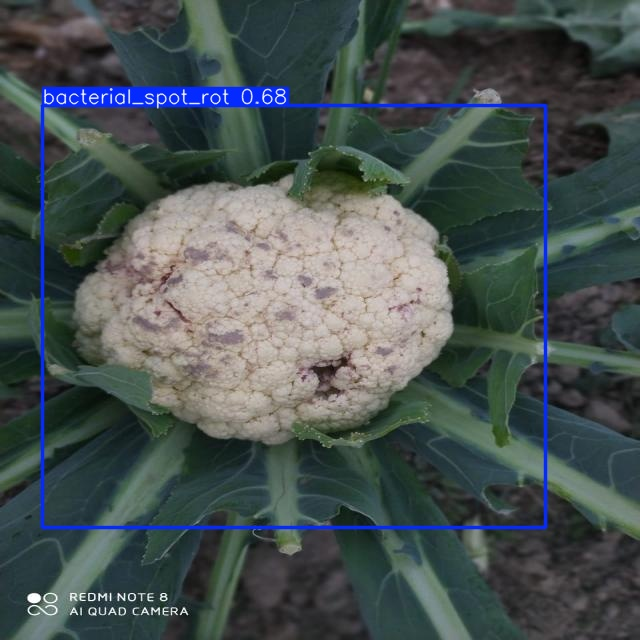

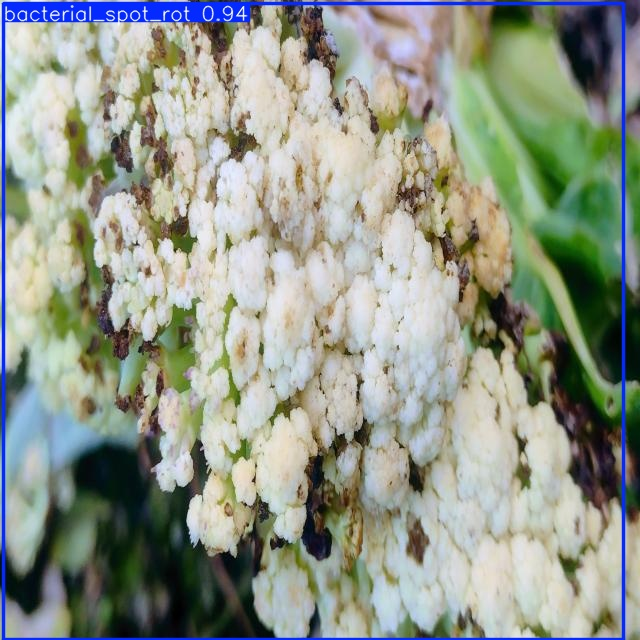

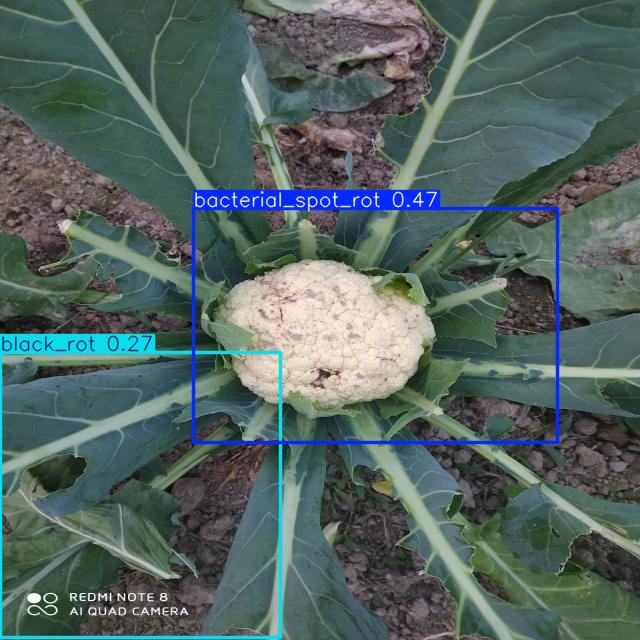

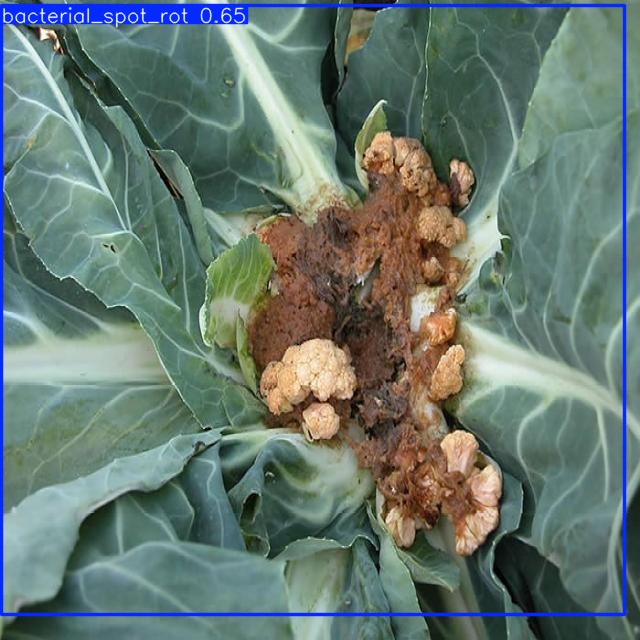

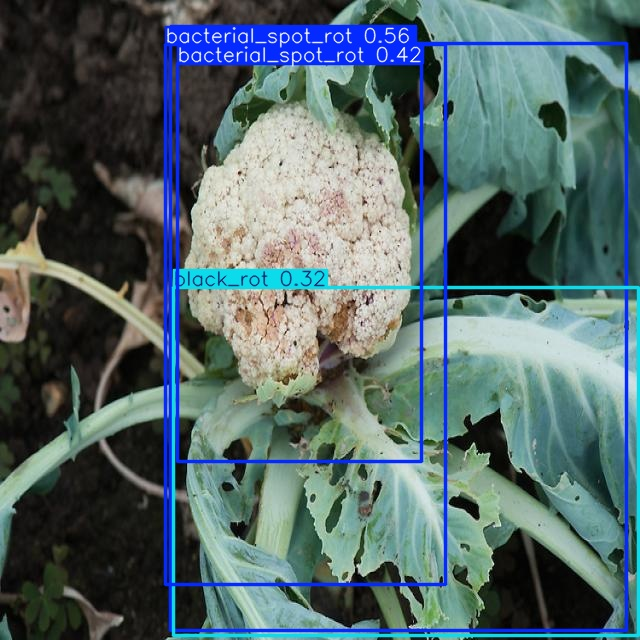

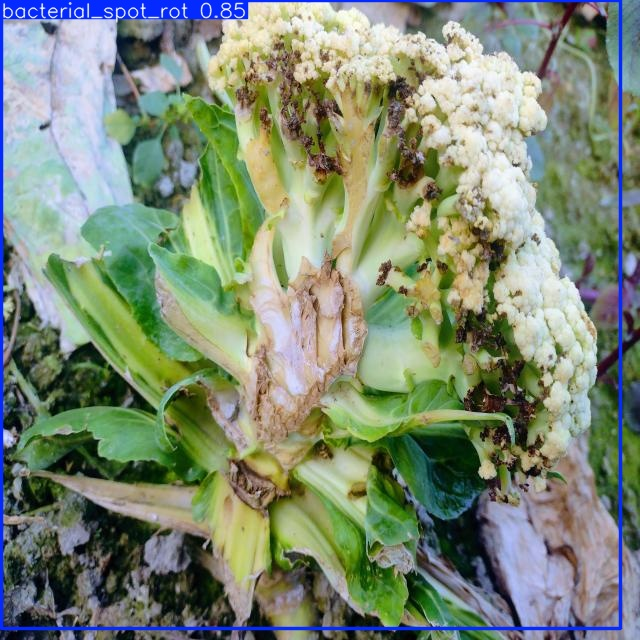

In [26]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('runs/detect/predict2/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")